<a href="https://colab.research.google.com/github/Ealbala/Proyecto-DS-I/blob/main/proyecto_ons_data_science_i_ezequiel_albala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Science CoderHouse [Comisión 61690]**
##Alumno: Ezequiel Albala

##Introducción

####El financiamiento es fundamental para las corporaciones argentinas, ya que les permite obtener los recursos necesarios para invertir en crecimiento, innovación y sostenibilidad. En un contexto económico fluctuante, acceder a capital a través del mercado de capitales puede ofrecerles la liquidez necesaria para enfrentar desafíos y aprovechar oportunidades. Además, una financiación adecuada fortalece su competitividad y contribuye al desarrollo del mercado local. Así, el financiamiento no solo impulsa el éxito de las empresas, sino que también fomenta el crecimiento económico del país.

## Emisiones de Obligaciones Negociables en Argentina
#### Este proyecto buscará analizar el instrumento más conocido globalmente de financiamiento corporativo a través del mercado de capitales, las Obligaciones Negociables.


##¿Qué es una Obligación Negociable?
####Las Obligaciones Negociables (“ON”) son instrumentos de deuda emitidos por empresas privadas. Tienen una tasa de interés fija o variable y un plazo de pago determinados.

####Las ONs se negocian en el mercado de capitales y son el equivalente a los bonos públicos, pero destinados a la financiación del sector privado.

##¿Qué características tiene cada emisión?

####El dataset describe características de cada emisión, como el emisor, moneda, tasa, plazo y monto emitido; así como también datos de variables económicas en la fecha en que fue emitida, como la tasa BADLAR, el tipo de cambio 'A' 3500 y la tasa de política monetaria, entre otras.

##Descripción del Problema

#### Las empresas necesitan conocer un estimado de la tasa a la que saldrán al mercado para poder comparar esta cifra con la rentabilidad de sus proyectos y su capacidad de repago. Este análisis les permite evaluar si el financiamiento es viable y si los costos asociados serán sostenibles a largo plazo.

##Objetivo

#### El objetivo principal es construir un modelo que permita estimar, en función del monto a emitir, el plazo, régimen de emisión,  resultados de emisiones anteriores del mismo emisor y variables macroeconómicas, la tasa a la que puede salir la próxima emisión. Este modelo buscará proporcionar a las empresas una herramienta analítica que facilite la toma de decisiones informadas sobre sus futuras emisiones en el mercado de capitales.



##Hipótesis

#### 1. Las emisiones de empresas grandes (Régimenes de Emisión "ON") consiguen financiarse a menor tasa.

#### 2. A mayor monto emitido, la tasa que la empresa debe aceptar es mayor.

#### 3. Las variables macroeconomicas (Tasa de politica monetaría), Tipo de Cambio, Riesgo País y Tasa de la FED son las variables que más impactan las emisiones segun la moneda de emisión.

#### 4. A mayor plazo, la tasa de emisión es mayor.

##Fuente

####El dataset proveniente de la Comisión Nacional de Valores (CNV) contiene las emisiones del mercado primario (primera vez que el activo es negociado en el mercado con el fin de financiar al emisor) desde enero de 2015 hasta agosto de 2024.

Se puede acceder en el siguiente enlace:
https://www.cnv.gov.ar/sitioWeb/Informes?columna=4

###Importación de Librerías y Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Exploración de Datos



In [ ]:
#Lectura del Dataset
df= pd.read_excel('/content/gdrive/MyDrive/Proyecto ONs - Data Science I - Albala Ezequiel/Emisiones ONs Coder.xlsx')
df.head(5)

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
0,2015-01-07,2015-01-08,Gas Argentino S.A.,Clase A-L Adicionales Diciembre 2014,USD,2547928,ON,Fija,1,0.08875,0.08875,11.900000,0.203125,8.58,0.38,749,0.0012
1,2015-01-09,2015-01-14,Puente Hnos. S.A.,Clase 2,$,50066000,VCP,Margen+Badlar,1,0.238125,0.238125,12.166667,0.203125,8.59,0.38,726,0.0012
2,2015-01-13,2015-01-16,Carsa S.A.,Serie IV,$,51100000,ON,Fija,1,0.29,0.29,12.166667,0.201250,8.59,0.38,729,0.0012
3,2015-01-14,2015-01-20,Industrial and Commercial Bank of China (Argen...,Clase IV,$,188777777,ON,Margen+Badlar,1,0.235625,0.235625,18.133333,0.200625,8.60,0.38,720,0.0012
4,2015-01-20,2015-01-22,Tarjeta Naranja S.A.,Clase XXVIII - Serie I,$,186500000,ON,Fija,1,0.275,0.275,9.000000,0.196250,8.61,0.38,720,0.0012


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Colocación                2142 non-null   datetime64[ns]
 1   Fecha de Emisión y Liquidación  2142 non-null   datetime64[ns]
 2   Sociedad                        2142 non-null   object        
 3   Serie/Clase                     2142 non-null   object        
 4   Moneda                          2142 non-null   object        
 5   Monto nominal
(moneda emisión)  2142 non-null   object        
 6   Régimen de emisión              2142 non-null   object        
 7   Tipo de Tasa                    2142 non-null   object        
 8   Precio de corte                 2142 non-null   object        
 9   TNA inicial                     2142 non-null   object        
 10  TIR inicial                     2142 non-null   object        
 11  Plaz

Index(['Fecha Colocación', 'Fecha de Emisión y Liquidación', 'Sociedad',
       'Serie/Clase', 'Moneda', 'Monto nominal\n(moneda emisión)',
       'Régimen de emisión', 'Tipo de Tasa', 'Precio de corte', 'TNA inicial',
       'TIR inicial', 'Plazo\n(meses)', 'Badlar TNA', 'Tipo de Cambio "A"3500',
       'Tasa de Politica Monetaria', 'Riesgo Pais', 'Tasa FED USD'],
      dtype='object')

El dataset contiene un total de 2144 filas y 17 columnas.

En principio, observamos dos situaciones que no suenan lógicas. 1) No hay valores nulos y 2)las columnas Monto Nominal, Precio de Corte, TNA Inicial y TIR Inicial son identificados como valores objetos.

Resultan relevantes para **predecir la TIR Inicial** las variables: Sociedad, Moneda, Monto Nominal (moneda emisión), Régimen de Emisión, Plazo (meses), Badlar TNA, Riesgo País, Tasa FED USD y el Tipo de Cambio "A" 3500.

In [ ]:
df.describe()

,Fecha Colocación,Fecha de Emisión y Liquidación,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
count,2142,2142,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,2020-04-02 08:41:40.840336384,2020-04-06 11:20:20.168067328,29.573405,0.440221,163.746611,0.506990,1355.673669,0.019129
min,2015-01-07 00:00:00,2015-01-08 00:00:00,-6.133333,0.182500,8.580000,0.247500,342.000000,0.000400
25%,2017-08-09 12:00:00,2017-08-12 00:00:00,18.233333,0.230625,17.230000,0.380000,520.000000,0.001300
50%,2020-09-02 12:00:00,2020-09-07 00:00:00,24.366667,0.341875,74.350000,0.380000,1487.000000,0.011600
75%,2022-11-22 18:00:00,2022-11-25 00:00:00,36.533333,0.512969,164.767500,0.635775,2024.000000,0.038300
max,2024-08-28 00:00:00,2024-08-30 00:00:00,365.233333,1.301875,950.080000,1.330000,3994.000000,0.053300
std,NaN,NaN,22.189491,0.269521,250.480510,0.254313,792.064245,0.019826


**Fecha colocación:** Como fue mencionado en la introducción abarca desde enero de 2015 hasta agosto de 2024

**Plazo:** Encontramos un error, ya que no puede haber plazo negativo y el mínimo se encuentra en -6,13, al mismo tiempo, sorprende que el plazo máximo haya sido 365,23 meses (30 años).

**Monto Nominal, Precio de Corte, TNA Inicial y TIR Inicial**: Tenemos que solucionar el problema ya que las cuatro variables deberían ser float.

In [ ]:
# Hay numeros que estan usando puntos para separar por miles.
df["Monto nominal\n(moneda emisión)"] = df["Monto nominal\n(moneda emisión)"].astype(str)
df["Monto nominal\n(moneda emisión)"] = df["Monto nominal\n(moneda emisión)"].str.replace(r'[^0-9]', '', regex=True)
df["Monto nominal\n(moneda emisión)"] = df["Monto nominal\n(moneda emisión)"].astype(int)
df["Monto nominal\n(moneda emisión)"].info()
df["Monto nominal\n(moneda emisión)"].head()

<class 'pandas.core.series.Series'>
RangeIndex: 2142 entries, 0 to 2141
Series name: Monto nominal
(moneda emisión)
Non-Null Count  Dtype
--------------  -----
2142 non-null   int64
dtypes: int64(1)
memory usage: 16.9 KB


,Monto nominal\n(moneda emisión)
0,2547928
1,50066000
2,51100000
3,188777777
4,186500000


In [ ]:
#Tanto en Precio de Corte, TNA Inicial y TIR Inicial, hay valores de string que dice "Sin Datos", esto los modificamos a NaN.
# Reemplazar "Sin Datos" por NaN en todo el DataFrame
df.replace("Sin datos", np.nan, inplace=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Colocación                2142 non-null   datetime64[ns]
 1   Fecha de Emisión y Liquidación  2142 non-null   datetime64[ns]
 2   Sociedad                        2142 non-null   object        
 3   Serie/Clase                     2142 non-null   object        
 4   Moneda                          2142 non-null   object        
 5   Monto nominal
(moneda emisión)  2142 non-null   int64         
 6   Régimen de emisión              2142 non-null   object        
 7   Tipo de Tasa                    2142 non-null   object        
 8   Precio de corte                 1554 non-null   float64       
 9   TNA inicial                     2140 non-null   float64       
 10  TIR inicial                     2115 non-null   float64       
 11  Plaz

<ipython-input-240-4758eb6ba46f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Sin datos", np.nan, inplace=True)


,0
Fecha Colocación,0
Fecha de Emisión y Liquidación,0
Sociedad,0
Serie/Clase,0
Moneda,0
Monto nominal\n(moneda emisión),0
Régimen de emisión,0
Tipo de Tasa,0
Precio de corte,588
TNA inicial,2


In [ ]:
#En la mayoría de ONs se licita tasa y no precio. Por lo que los NaN refieren a que el precio no se licito y se mantuvo en 100%.
#Supuesto bastante aceptable en el ámbito financiero.
df["Precio de corte"] = df["Precio de corte"].fillna(1)
df["Precio de corte"].isna().sum()


0

In [ ]:
#Eliminamos las filas donde hay NaN tanto en TNA Inicial como en TIR Inicial
df = df.dropna(subset=["TNA inicial", "TIR inicial"], how='all')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Colocación                2140 non-null   datetime64[ns]
 1   Fecha de Emisión y Liquidación  2140 non-null   datetime64[ns]
 2   Sociedad                        2140 non-null   object        
 3   Serie/Clase                     2140 non-null   object        
 4   Moneda                          2140 non-null   object        
 5   Monto nominal
(moneda emisión)  2140 non-null   int64         
 6   Régimen de emisión              2140 non-null   object        
 7   Tipo de Tasa                    2140 non-null   object        
 8   Precio de corte                 2140 non-null   float64       
 9   TNA inicial                     2140 non-null   float64       
 10  TIR inicial                     2115 non-null   float64       
 11  Plazo
(me

In [ ]:
#En los datos nulos de TIR Inicial asumimos que el valor es igual a la TNA Inicial (Asumimos que el horizonte es anual y no se reinvierte los pagos intermedios).
#Cuando el Precio de corte es 100%, la TIR inicial y TNA inicial son iguales.
df["TIR inicial"] = df["TIR inicial"].fillna(df["TNA inicial"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Colocación                2140 non-null   datetime64[ns]
 1   Fecha de Emisión y Liquidación  2140 non-null   datetime64[ns]
 2   Sociedad                        2140 non-null   object        
 3   Serie/Clase                     2140 non-null   object        
 4   Moneda                          2140 non-null   object        
 5   Monto nominal
(moneda emisión)  2140 non-null   int64         
 6   Régimen de emisión              2140 non-null   object        
 7   Tipo de Tasa                    2140 non-null   object        
 8   Precio de corte                 2140 non-null   float64       
 9   TNA inicial                     2140 non-null   float64       
 10  TIR inicial                     2140 non-null   float64       
 11  Plazo
(me

<ipython-input-243-d6bcaf9258e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIR inicial"] = df["TIR inicial"].fillna(df["TNA inicial"])


In [ ]:
df.describe()

,Fecha Colocación,Fecha de Emisión y Liquidación,Monto nominal\n(moneda emisión),Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
count,2140,2140,2.140000e+03,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,2020-04-03 15:31:17.383177472,2020-04-07 18:12:06.728971776,1.232134e+13,1.005139,0.263000,0.259688,29.584065,0.440430,163.887439,0.507151,1356.425701,0.019141
min,2015-01-07 00:00:00,2015-01-08 00:00:00,5.504000e+03,0.744700,0.000000,-0.208596,-6.133333,0.182500,8.580000,0.247500,342.000000,0.000400
25%,2017-08-10 12:00:00,2017-08-14 00:00:00,1.382427e+07,1.000000,0.059800,0.057875,18.233333,0.230625,17.250000,0.380000,520.000000,0.001300
50%,2020-09-03 00:00:00,2020-09-07 12:00:00,6.500000e+07,1.000000,0.252175,0.250025,24.366667,0.341875,74.380000,0.380000,1487.000000,0.011600
75%,2022-11-23 00:00:00,2022-11-25 18:00:00,3.000000e+08,1.000000,0.376700,0.374094,36.533333,0.513125,164.850000,0.636800,2024.750000,0.038300
max,2024-08-28 00:00:00,2024-08-30 00:00:00,2.636590e+16,1.615500,1.343750,1.343750,365.233333,1.301875,950.080000,1.330000,3994.000000,0.053300
std,NaN,NaN,5.699486e+14,0.032520,0.253787,0.256005,22.196319,0.269560,250.555144,0.254373,792.031142,0.019830


In [ ]:
df.loc[df['Monto nominal\n(moneda emisión)'] == abs(df['Monto nominal\n(moneda emisión)'].max())]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
1161,2021-02-19,2021-02-24,Plaza Logística S.R.L.,Clase 6,UVA,26365900073678043,ON,Fija,1.0,0.0248,0.0248,42.566667,0.3375,89.16,0.38,1488,0.0007


Encontramos un error al cargar el monto de esta emisión, lo solucionamos en el siguiente código, el dato fue encontrado del aviso de resultado de la emisión.

In [ ]:
df.loc[ df[(df['Sociedad'] == 'Plaza Logística S.R.L.') & (df['Serie/Clase'] == 'Clase 6')].index, 'Monto nominal\n(moneda emisión)'] = 1799999998.03
df[df['Sociedad'] == 'Plaza Logística S.R.L.']

<ipython-input-246-7b3485599ed5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1799999998.03' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ df[(df['Sociedad'] == 'Plaza Logística S.R.L.') & (df['Serie/Clase'] == 'Clase 6')].index, 'Monto nominal\n(moneda emisión)'] = 1799999998.03


,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
611,2017-12-13,2017-12-18,Plaza Logística S.R.L.,Clase I,USD,2.706253e+07,ON,Fija,1.0000,0.062500,0.062500,36.533333,0.233750,17.32,0.2875,363,0.0117
783,2018-11-15,2018-11-21,Plaza Logística S.R.L.,Clase 2,UVA,2.386896e+06,ON,Fija,1.0000,0.110000,0.110000,24.366667,0.522500,36.07,0.6250,649,0.0220
784,2018-11-15,2018-11-21,Plaza Logística S.R.L.,Clase 3,USD,1.811312e+07,ON,Fija,1.0000,0.102500,0.102500,12.166667,0.522500,36.07,0.6250,649,0.0220
1027,2020-07-07,2020-07-14,Plaza Logística S.R.L.,Clase 4,UVA,3.898459e+07,ON,Fija,1.0000,0.044900,0.044900,24.333333,0.297500,70.88,0.3800,2343,0.0009
1121,2020-12-03,2020-12-04,Plaza Logística S.R.L.,Clase 5,USD,7.876752e+06,ON,Fija,1.0000,0.062500,0.062500,30.400000,0.341875,81.56,0.3800,1426,0.0009
1161,2021-02-19,2021-02-24,Plaza Logística S.R.L.,Clase 6,UVA,1.800000e+09,ON,Fija,1.0000,0.024800,0.024800,42.566667,0.337500,89.16,0.3800,1488,0.0007
1232,2021-06-10,2021-06-15,Plaza Logística S.R.L.,Clase 7,UVA,2.339428e+07,ON,Fija,1.0295,0.044900,0.029654,24.333333,0.342500,95.10,0.3800,1474,0.0006
1769,2023-05-30,2023-05-31,Plaza Logística S.R.L.,Clase 9,$,3.674350e+09,ON,Margen+Badlar,1.0000,0.953125,0.953125,12.233333,0.923125,238.79,0.9700,2590,0.0508
1836,2023-07-26,2023-07-27,Plaza Logística S.R.L.,Clase 10,Dólar linked,2.000000e+07,ON,Fija,1.0625,0.000000,-0.020833,36.533333,0.918750,272.40,0.9700,1991,0.0508
1953,2024-02-07,2024-02-08,Plaza Logística S.R.L.,Clase 11,$,3.994444e+09,ON,Margen+Badlar,1.0000,1.078950,1.078950,12.200000,1.088750,830.15,1.0000,1928,0.0533


Una vez solucionado los valores de Monto Nominal, Plazo, Precio de Corte, TNA Inicial y TIR Inicial, tenemos que analizar que haya normalización en el Régimen de emisión, Moneda y Tipo de Tasa.

In [ ]:
#Analizó los  Régimenes de Emisión
df["Régimen de emisión"].unique()

array(['ON', 'VCP', 'ON PyME', 'ON PYME', 'PyME Garantizada', 'On PyME',
       'VCP PyME', 'ON '], dtype=object)

In [ ]:
#Normalizo los Régimenes de Emisión
df["Régimen de emisión"] = df["Régimen de emisión"].replace({
    'ON ': 'ON',               # Reemplazar 'ON ' con 'ON'
    'On PyME': 'ON PYME',       # Reemplazar 'On PyME' con 'ON PYME'
    'ON PyME': 'ON PYME'        # Asegurarse de que todas las variantes sean 'ON PYME'
})
df["Régimen de emisión"].unique()

array(['ON', 'VCP', 'ON PYME', 'PyME Garantizada', 'VCP PyME'],
      dtype=object)

##¿Qué es una ON Pyme Garantizada?
Las Obligaciones Negociables pyme garantizadas son ONs de similares características que las ONs de panel general, descriptas anteriormente , pero con la diferencia de que una (o varias) entidades de garantía participan como avalistas de la emisión.


In [ ]:
print(df['Moneda'].unique())

['USD' '$' 'Dólar Linked' 'SFr' 'UVA' 'CLP' 'Dólar linked']


Eliminamos las monedas que no sean tradicionales como el SFr y CLP.

In [ ]:
#Normalizo las monedas de emisión
df['Moneda'] = df['Moneda'].replace('Dólar linked', 'Dólar Linked')
df = df[~df['Moneda'].isin(['CLP', 'SFr'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 0 to 2141
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Colocación                2138 non-null   datetime64[ns]
 1   Fecha de Emisión y Liquidación  2138 non-null   datetime64[ns]
 2   Sociedad                        2138 non-null   object        
 3   Serie/Clase                     2138 non-null   object        
 4   Moneda                          2138 non-null   object        
 5   Monto nominal
(moneda emisión)  2138 non-null   float64       
 6   Régimen de emisión              2138 non-null   object        
 7   Tipo de Tasa                    2138 non-null   object        
 8   Precio de corte                 2138 non-null   float64       
 9   TNA inicial                     2138 non-null   float64       
 10  TIR inicial                     2138 non-null   float64       
 11  Plazo
(me

In [ ]:
print(df['Tipo de Tasa'].unique())

['Fija' 'Margen+Badlar' 'Mixta' 'Otro' 'Badlar' 'fija' 'margen+badlar'
 'TPM' 'TM20+margen' 'Margen+badlar' 'margen+BADLAR' 'Margen+BADLAR'
 'BADLAR']


In [ ]:
df["Tipo de Tasa"] = df["Tipo de Tasa"].replace({
    'margen+badlar': 'Margen+Badlar',
    'Badlar': 'Margen+Badlar',
    'Margen+badlar': 'Margen+Badlar',
    'Margen+BADLAR': 'Margen+Badlar',
    'BADLAR': 'Margen+Badlar',
    'margen+BADLAR': 'Margen+Badlar'
})

print(df["Tipo de Tasa"].unique())

['Fija' 'Margen+Badlar' 'Mixta' 'Otro' 'fija' 'TPM' 'TM20+margen']


<ipython-input-252-c56046ba5f6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tipo de Tasa"] = df["Tipo de Tasa"].replace({


##¿Qué es la tasa Badlar?
Tasa de interés para depósitos superiores al millón de pesos en un plazo de 30 a 35 días y que es mayor a la tasa que se paga en depósitos a plazo fijo. Se trata de una tasa variable calculada a diario por el BCRA.

Las ONs en pesos se emiten a un spread por encima de una tasa variable que se conoce como Badlar.

Por último tenemos que solucionar los Plazos que sean 0 o menores.

In [ ]:
df.loc[df['Plazo\n(meses)'] <= 0]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
1358,2021-12-02,2021-12-06,Pan American Energy SL Sucursal Argentina,Clase 15,$,2.642800e+09,ON,Margen+Badlar,1.0,0.367625,0.367625,0.000000,0.340625,101.07,0.38,1816,0.0008
1879,2023-09-19,2023-09-21,Albanesi Energía S.A.,Clase XI,USD,6.734405e+06,ON,Fija,1.0,0.095000,0.095000,-6.133333,1.128125,349.98,1.18,2194,0.0533


In [ ]:
df.loc[df['Plazo\n(meses)'] < 0, 'Plazo\n(meses)'] = -df.loc[df['Plazo\n(meses)'] < 0, 'Plazo\n(meses)']
df.loc[df['Plazo\n(meses)'] == abs(df['Plazo\n(meses)'].min())]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
1358,2021-12-02,2021-12-06,Pan American Energy SL Sucursal Argentina,Clase 15,$,2.642800e+09,ON,Margen+Badlar,1.0,0.367625,0.367625,0.0,0.340625,101.07,0.38,1816,0.0008


El siguiente dato fue extraído del aviso de resultados de la emisión correspondiente.

In [ ]:
df.loc[df['Plazo\n(meses)'] == 0, 'Plazo\n(meses)'] = 10.08
df.loc[df['Plazo\n(meses)'] == 10.08]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
1358,2021-12-02,2021-12-06,Pan American Energy SL Sucursal Argentina,Clase 15,$,2.642800e+09,ON,Margen+Badlar,1.0,0.367625,0.367625,10.08,0.340625,101.07,0.38,1816,0.0008


In [ ]:
df.loc[df['Plazo\n(meses)'] == abs(df['Plazo\n(meses)'].max())]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
607,2017-12-07,2017-12-15,YPF S.A.,Clase LIV,USD,750000000.0,ON,Fija,1.0,0.07,0.07,365.233333,0.22875,17.31,0.2875,365,0.0116


El plazo máximo de 30 años es correcto, fue emitido por YPF posiblemente la empresa con mejores condiciones de emisión de la Argentina.

##¿Hay meses con mayor cantidad de emisiones que otros? ¿En qué año hubo más emisiones?

In [ ]:
df_ON = df[~df["Régimen de emisión"].isin(["VCP", "VCP PyME"])]
df_ON['Mes'] = df_ON['Fecha Colocación'].dt.month
emisiones_por_mes = df_ON.groupby(['Mes', 'Moneda']).size().reset_index(name='Cantidad')
print(emisiones_por_mes.head())

   Mes        Moneda  Cantidad
0    1             $        79
1    1  Dólar Linked        15
2    1           USD        25
3    1           UVA         2
4    2             $       110


<ipython-input-257-e365a85d39fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ON['Mes'] = df_ON['Fecha Colocación'].dt.month


In [ ]:
df_RE = df_ON["Régimen de emisión"]
df_ON = pd.get_dummies(df_ON, columns=['Régimen de emisión'], prefix='tipo', drop_first=False)
df_ON = pd.concat([df_ON, df_RE], axis=1)
df_ON.head()

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión
0,2015-01-07,2015-01-08,Gas Argentino S.A.,Clase A-L Adicionales Diciembre 2014,USD,2547928.0,Fija,1.0,0.088750,0.088750,...,0.203125,8.58,0.38,749,0.0012,1,True,False,False,ON
2,2015-01-13,2015-01-16,Carsa S.A.,Serie IV,$,51100000.0,Fija,1.0,0.290000,0.290000,...,0.201250,8.59,0.38,729,0.0012,1,True,False,False,ON
3,2015-01-14,2015-01-20,Industrial and Commercial Bank of China (Argen...,Clase IV,$,188777777.0,Margen+Badlar,1.0,0.235625,0.235625,...,0.200625,8.60,0.38,720,0.0012,1,True,False,False,ON
4,2015-01-20,2015-01-22,Tarjeta Naranja S.A.,Clase XXVIII - Serie I,$,186500000.0,Fija,1.0,0.275000,0.275000,...,0.196250,8.61,0.38,720,0.0012,1,True,False,False,ON
5,2015-01-20,2015-01-22,Tarjeta Naranja S.A.,Clase XXVIII - Serie II,$,129000000.0,Margen+Badlar,1.0,0.241250,0.241250,...,0.196250,8.61,0.38,720,0.0012,1,True,False,False,ON


Reemplazamos el valor categorico de los Régimenes de emisión para poder analizar como se relaciona con las tasas de emisión a través del proceso "One Hot Encoding".

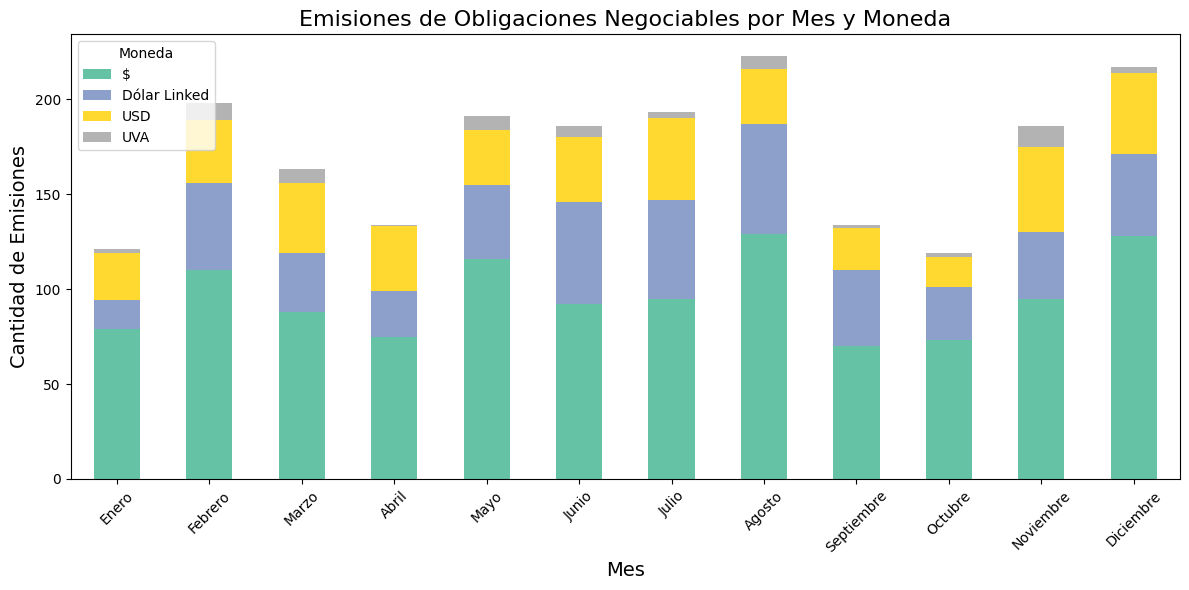

In [ ]:
pivot_df = emisiones_por_mes.pivot(index='Mes', columns='Moneda', values='Cantidad').fillna(0)


plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')


plt.title('Emisiones de Obligaciones Negociables por Mes y Moneda', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Emisiones', fontsize=14)
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(title='Moneda')
plt.tight_layout()

plt.show()

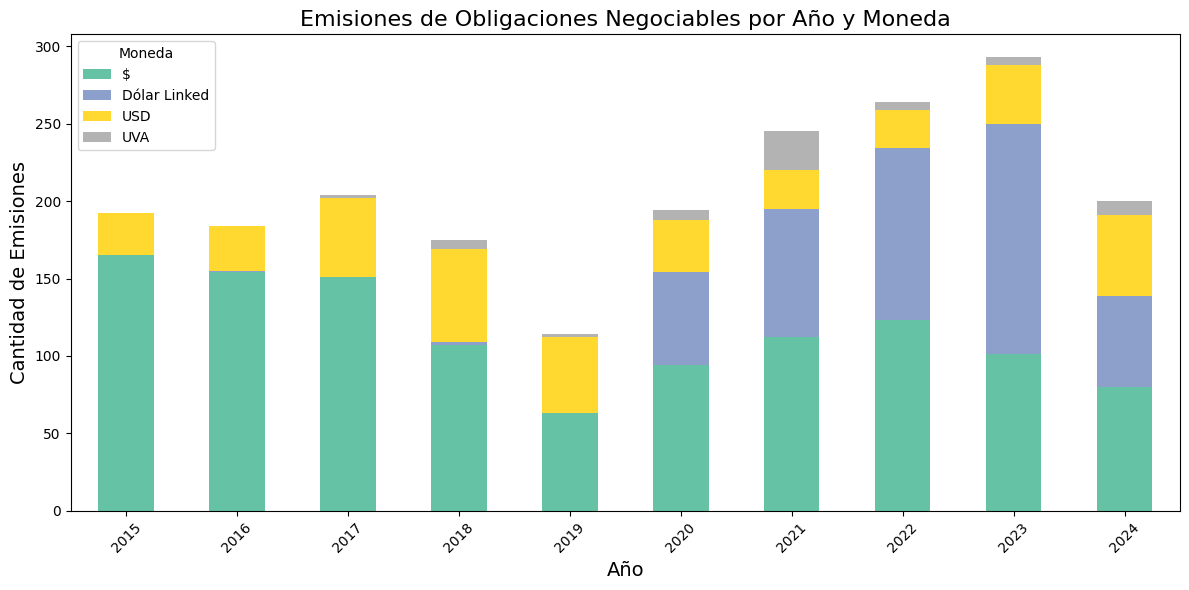

In [ ]:
df_ON['Año'] = df_ON['Fecha Colocación'].dt.year

emisiones_por_año = df_ON.groupby(['Año', 'Moneda']).size().reset_index(name='Cantidad')

pivot_df = emisiones_por_año.pivot(index='Año', columns='Moneda', values='Cantidad').fillna(0)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')

plt.title('Emisiones de Obligaciones Negociables por Año y Moneda', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Emisiones', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Moneda')
plt.tight_layout()

plt.show()

Interesante poder observar la baja cantidad de emisiones que tuvo el 2019.

El gobierno Argentino en 2019 despues de perder las PASO se enfrento a una gran caída de confianza. Al no poder renovar deuda de corto plazo en dólares (Letes), su ministro de Economía (Hernán Lacunza) decide modificar unilateralmente la fecha del pago del capital, entrando de esa manera en default.

Lo que se ve reflejado en las emisiones de financiamiento de las empresas argentinas.

## ¿Qué tamaño de empresa emite más Obligaciones Negociables? ¿Las empresas grandes o las PyMEs?

In [ ]:
cantidad_regimenes = df_ON.groupby('Régimen de emisión')['Régimen de emisión'].count()
print("\nCantidad de emisiones por régimen:")
print(cantidad_regimenes)



Cantidad de emisiones por régimen:
Régimen de emisión
ON                  1491
ON PYME              143
PyME Garantizada     431
Name: Régimen de emisión, dtype: int64


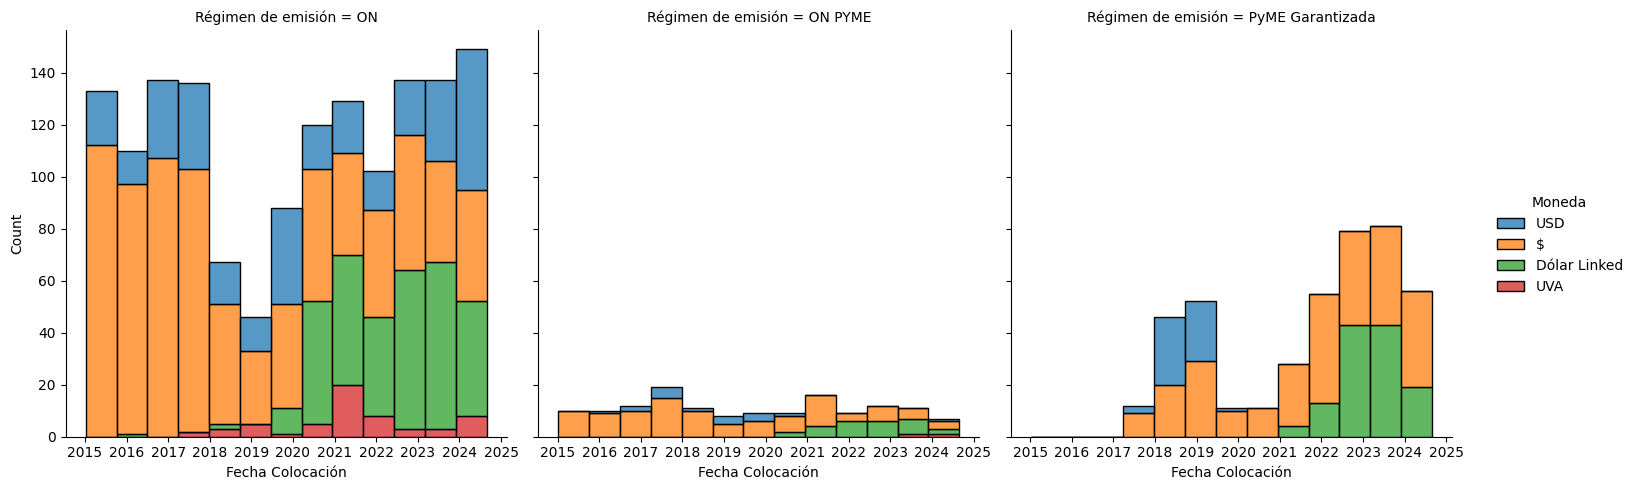

In [ ]:
sns.displot(data=df_ON, x="Fecha Colocación", hue="Moneda", col="Régimen de emisión", multiple="stack" )


Las Obligaciones Negociables (ON) son emitidas principalmente por empresas grandes, ya que son más conocidas en el mercado y tienen una mayor visibilidad. Esta notoriedad les permite atraer a un número más amplio de inversores.

Es más probable que las empresas que anteriormente han emitido Obligaciones Negociables (ON) vuelvan a hacerlo, ya que su historial crediticio positivo y la familiaridad con el proceso generan confianza entre los inversores. Esta experiencia previa les permite acceder al mercado con mayor facilidad, ya que los inversores ya conocen su reputación y desempeño, lo que reduce la percepción de riesgo asociado a nuevas emisiones.

##¿Cuáles son las empresas que más ONs emitieron en distintas monedas?

Para analizar el monto emitido, vamos a tener que separar la moneda.

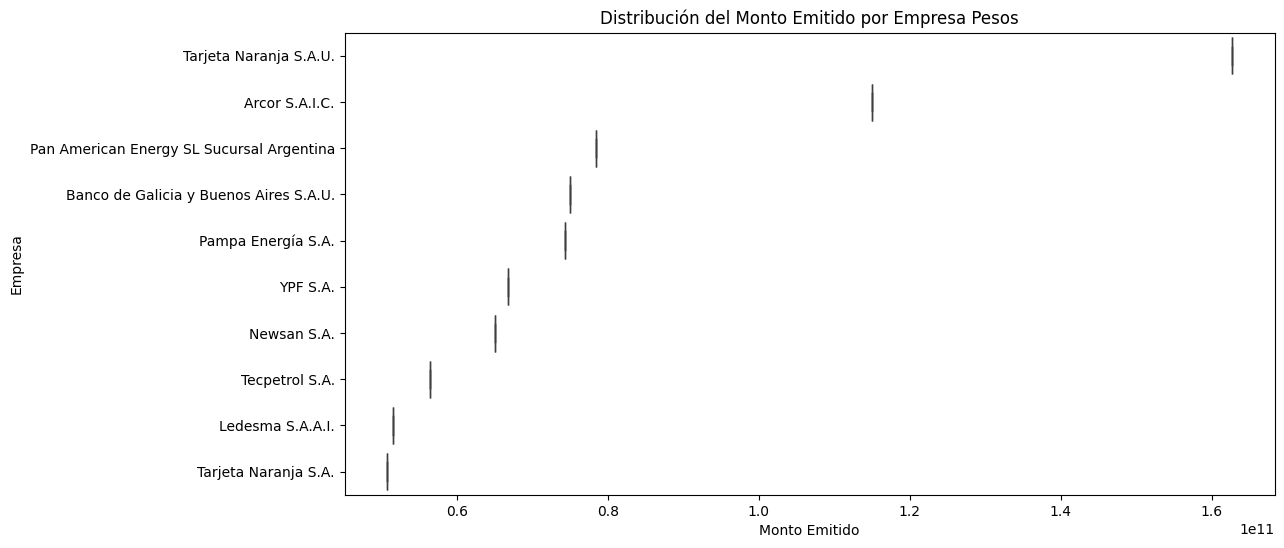

In [ ]:
df_ON_pesos = df_ON[df_ON["Moneda"] == "$"]
monto_emitido = df_ON_pesos.groupby('Sociedad')['Monto nominal\n(moneda emisión)'].sum().reset_index()
monto_emitido = monto_emitido.sort_values(by='Monto nominal\n(moneda emisión)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Monto nominal\n(moneda emisión)', y='Sociedad', data=monto_emitido)
plt.xlabel('Monto Emitido')
plt.ylabel('Empresa')
plt.title('Distribución del Monto Emitido por Empresa Pesos')
plt.show()

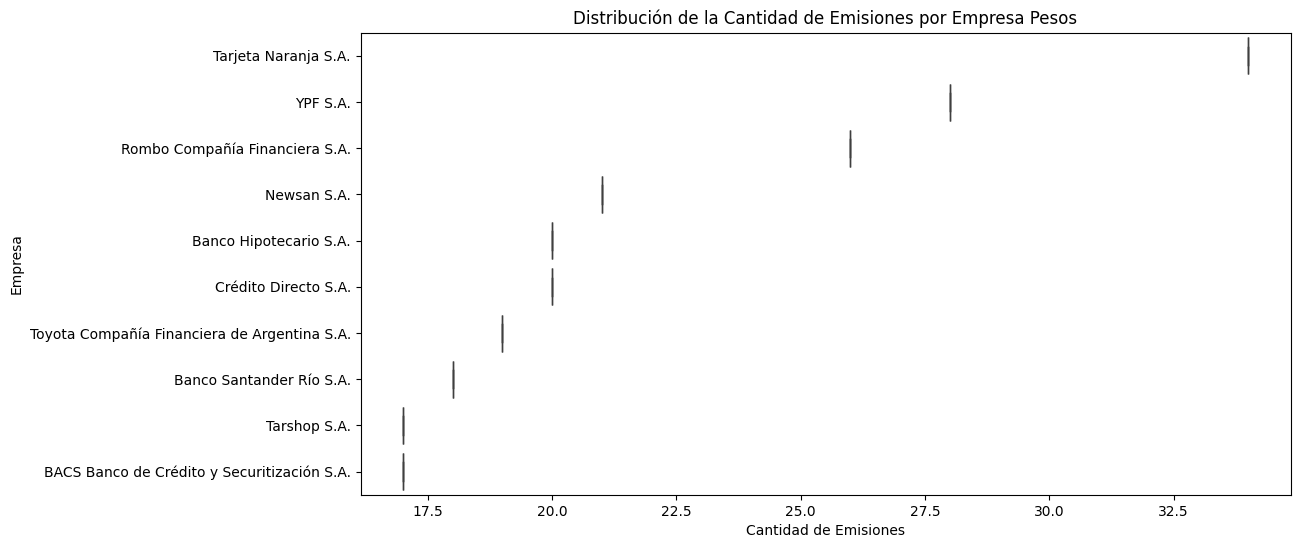

In [ ]:
cantidad_emisiones = df_ON_pesos.groupby('Sociedad')['Monto nominal\n(moneda emisión)'].count().reset_index()
cantidad_emisiones.columns = ['Sociedad', 'Cantidad de Emisiones']
cantidad_emisiones = cantidad_emisiones.sort_values(by='Cantidad de Emisiones', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cantidad de Emisiones', y='Sociedad', data=cantidad_emisiones)
plt.xlabel('Cantidad de Emisiones')
plt.ylabel('Empresa')
plt.title('Distribución de la Cantidad de Emisiones por Empresa Pesos')
plt.show()

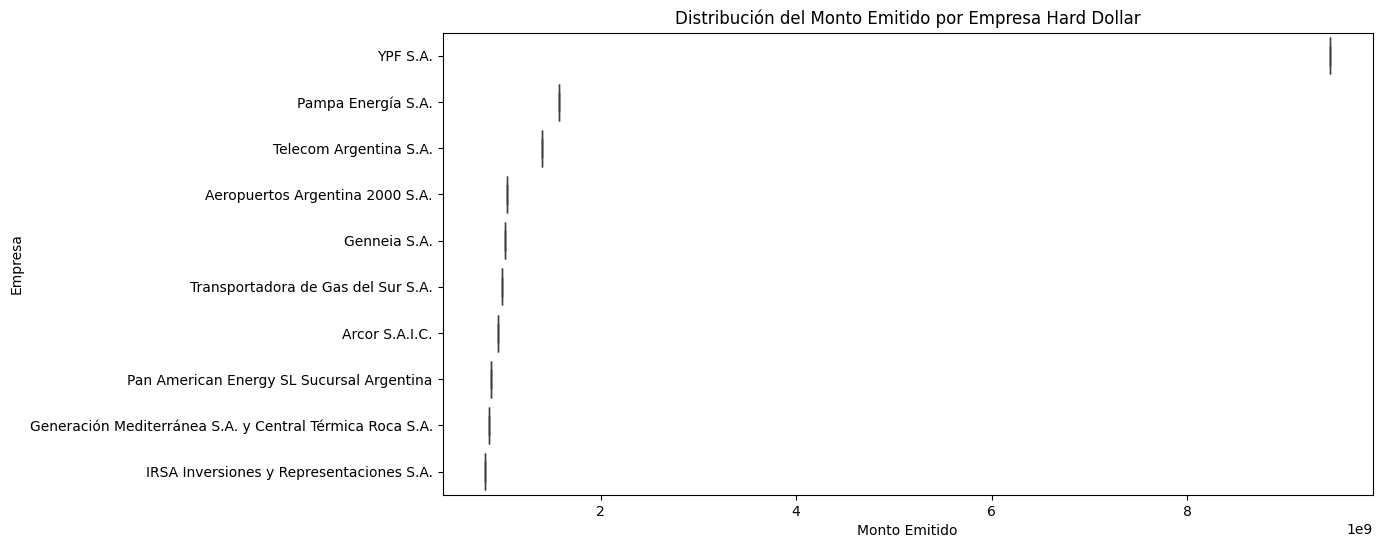

In [ ]:
df_ON_USD = df_ON[df_ON["Moneda"] == "USD"]
monto_emitido = df_ON_USD.groupby('Sociedad')['Monto nominal\n(moneda emisión)'].sum().reset_index()
monto_emitido = monto_emitido.sort_values(by='Monto nominal\n(moneda emisión)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Monto nominal\n(moneda emisión)', y='Sociedad', data=monto_emitido)
plt.xlabel('Monto Emitido')
plt.ylabel('Empresa')
plt.title('Distribución del Monto Emitido por Empresa Hard Dollar')
plt.show()

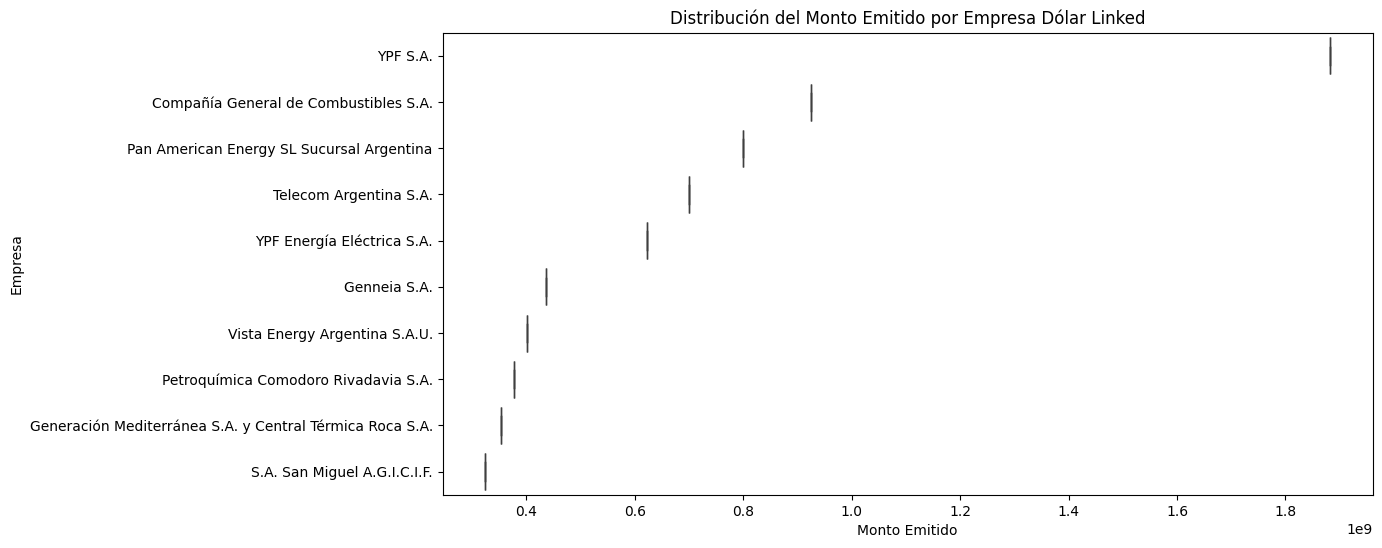

In [ ]:
df_ON_DL = df_ON[df_ON["Moneda"] == "Dólar Linked"]
monto_emitido = df_ON_DL.groupby('Sociedad')['Monto nominal\n(moneda emisión)'].sum().reset_index()
monto_emitido = monto_emitido.sort_values(by='Monto nominal\n(moneda emisión)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Monto nominal\n(moneda emisión)', y='Sociedad', data=monto_emitido)
plt.xlabel('Monto Emitido')
plt.ylabel('Empresa')
plt.title('Distribución del Monto Emitido por Empresa Dólar Linked')
plt.show()

##Emisiones en Pesos

In [ ]:
cantidad_regimenes = df_ON_pesos.groupby('Régimen de emisión')['Régimen de emisión'].count()
print("\nCantidad de emisiones por régimen:")
print(cantidad_regimenes)


Cantidad de emisiones por régimen:
Régimen de emisión
ON                  795
ON PYME              99
PyME Garantizada    256
Name: Régimen de emisión, dtype: int64


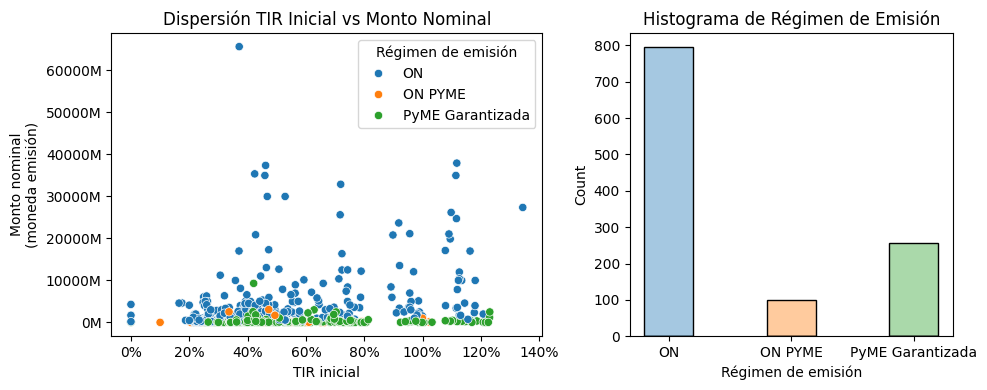

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.scatterplot(data=df_ON_pesos, x="TIR inicial", y="Monto nominal\n(moneda emisión)", hue="Régimen de emisión", ax=axs[0])
axs[0].set_title('Dispersión TIR Inicial vs Monto Nominal')

axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

sns.histplot(data=df_ON_pesos, x="Régimen de emisión", hue="Régimen de emisión", shrink=0.4, alpha=0.4, legend=False, ax=axs[1])
axs[1].set_title('Histograma de Régimen de Emisión')

f.tight_layout()
plt.show()


Interesante resulta analizar la emisior por 60.000M de pesos. Tambien las 3 emisiones que tienen tasa 0% y la máxima de 140%

In [ ]:
df_ON_pesos.loc[df_ON_pesos['Monto nominal\n(moneda emisión)'] == df_ON_pesos['Monto nominal\n(moneda emisión)'].max()]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
2054,2024-06-06,2024-06-11,Arcor S.A.I.C.,Clase 23,$,6.568120e+10,Margen+Badlar,1.0,0.37125,0.37125,...,898.5,0.4,1596,0.0533,6,True,False,False,ON,2024


Arcor fue el que emitio 6.000M tiene sentido al ser una empresa enorme.

In [ ]:
df_ON_pesos.loc[df_ON_pesos['TIR inicial'] == df_ON_pesos['TIR inicial'].max()]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
1915,2023-11-01,2023-11-03,Tarjeta Naranja S.A.U.,Clase LX,$,2.738132e+10,Margen+Badlar,1.0,1.34375,1.34375,...,349.99,1.33,2601,0.0533,11,True,False,False,ON,2023


La tasa de politica monetaria en 133% y la badlar en 129% facilita entender por que tarjeta naranja salio a emitir a 134%. Salio a Badlar + 5%.

In [ ]:
df_ON_pesos.loc[df_ON_pesos['TNA inicial'] < 0.15]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
147,2015-09-28,2015-09-30,Rogiro Aceros S.A.,Serie VIII - Clase I,$,50000000.0,Mixta,1.0,0.0001,0.0001,...,9.41,0.38,598,0.0013,9,True,False,False,ON,2015
148,2015-09-28,2015-09-30,Vetanco S.A.,Sin denominación,$,15000000.0,Margen+Badlar,1.0,0.1000,0.1000,...,9.41,0.38,598,0.0013,9,False,True,False,ON PYME,2015


Al tener la TNA y la TIR en 0. Decido no utilizar estos dos datos.

In [ ]:
df_ON_pesos = df_ON_pesos[df_ON_pesos['TNA inicial'] >= 0.15]

In [ ]:
df_ON_pesos.loc[df_ON_pesos['TIR inicial'] < 0.15]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
1461,2022-05-19,2022-05-24,Asociación Civil Sumatoria para una Nueva Econ...,Clase II Serie II,$,5.490000e+07,Margen+Badlar,1.0,0.465625,0.0,...,118.36,0.49,1944,0.0083,5,False,False,True,PyME Garantizada,2022
1504,2022-07-14,2022-07-19,Petroquímica Comodoro Rivadavia S.A.,Clase I,$,1.704907e+09,Margen+Badlar,1.0,0.510000,0.0,...,128.02,0.52,2756,0.0158,7,True,False,False,ON,2022
1505,2022-07-14,2022-07-19,Petroquímica Comodoro Rivadavia S.A.,Clase J,$,4.295093e+09,Margen+Badlar,1.0,0.510000,0.0,...,128.02,0.52,2756,0.0158,7,True,False,False,ON,2022
1567,2022-09-28,2022-09-30,Agroempresa Colón S.A.,Serie VII Clase I,$,1.000000e+08,Margen+Badlar,1.0,0.690000,0.0,...,146.84,0.75,2640,0.0308,9,False,False,True,PyME Garantizada,2022
1665,2023-02-02,2023-02-06,Pro Mujer Servicios Financieros S.A.,Serie I,$,2.000000e+08,Margen+Badlar,1.0,0.691875,0.0,...,187.61,0.75,1795,0.0458,2,True,False,False,ON,2023


Estos datos estan mal cargados, la TIR inicial deberia ser igual a la TNA Inicial. Ya que el precio salio al 100%.

In [ ]:
df_ON_pesos.loc[df_ON_pesos['TIR inicial'] < 0.15, 'TIR inicial'] = df_ON_pesos['TNA inicial']
df_ON_pesos.loc[df_ON_pesos['TIR inicial'] < 0.15]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año


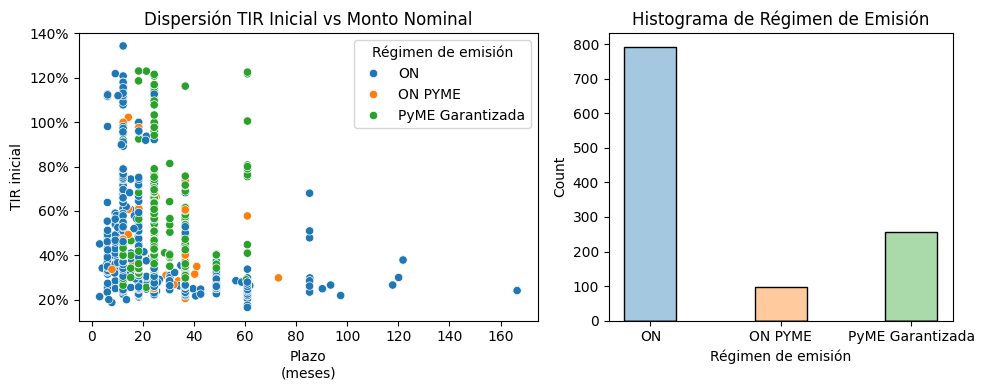

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.scatterplot(data=df_ON_pesos, x="Plazo\n(meses)", y="TIR inicial", hue="Régimen de emisión", ax=axs[0])
axs[0].set_title('Dispersión TIR Inicial vs Monto Nominal')


axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

sns.histplot(data=df_ON_pesos, x="Régimen de emisión", hue="Régimen de emisión", shrink=0.4, alpha=0.4, legend=False, ax=axs[1])
axs[1].set_title('Histograma de Régimen de Emisión')

f.tight_layout()
plt.show()

In [ ]:
df_ON_pesos.loc[df_ON_pesos['Plazo\n(meses)'] == df_ON_pesos['Plazo\n(meses)'].max()]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
722,2018-04-24,2018-04-27,Industrias Metalúrgicas Pescarmona S.A.i.C. y F.,Clase III,$,283757656.0,Margen+Badlar,1.0,0.241,0.241,...,20.25,0.2725,403,0.017,4,True,False,False,ON,2018


Interesante emisión de una empresa poco conocida con vencimiento en 2031.

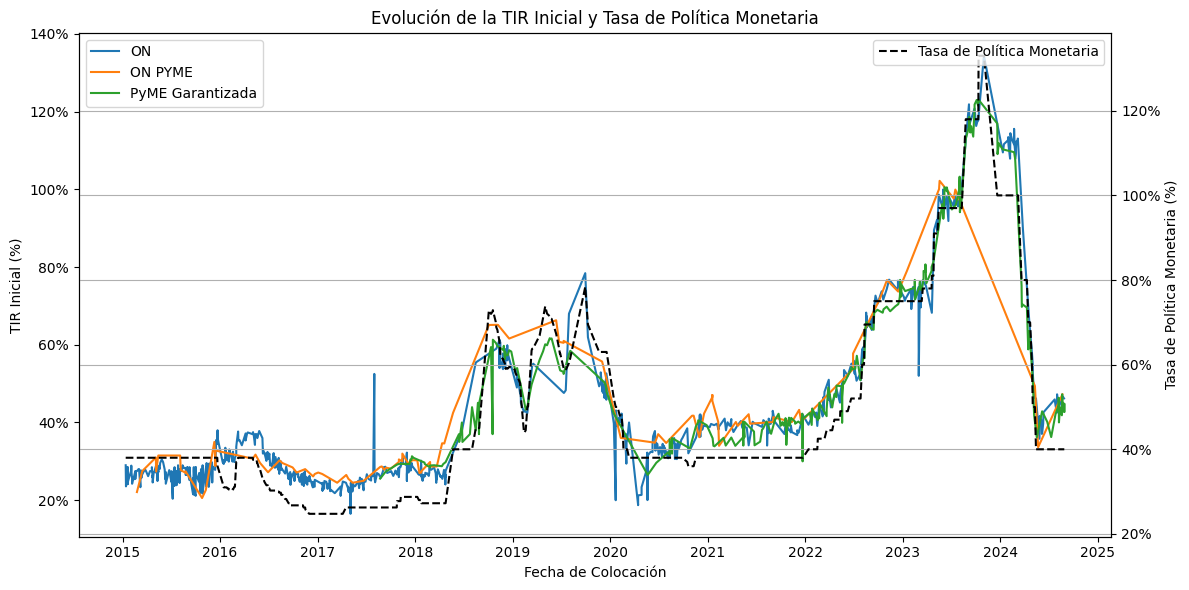

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

for regimen in ['ON', 'ON PYME', 'PyME Garantizada']:
    df_regimen = df_ON_pesos[df_ON_pesos['Régimen de emisión'] == regimen]
    if not df_regimen.empty:
        ax1.plot(df_regimen['Fecha Colocación'], df_regimen['TIR inicial'] * 100, label=regimen)

ax1.set_xlabel('Fecha de Colocación')
ax1.set_ylabel('TIR Inicial (%)')
ax1.tick_params(axis='y')
ax1.set_title('Evolución de la TIR Inicial y Tasa de Política Monetaria')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

ax2 = ax1.twinx()
ax2.plot(df_ON_pesos['Fecha Colocación'], df_ON_pesos['Tasa de Politica Monetaria'] * 100, color='black', label='Tasa de Política Monetaria', linestyle='--')

ax2.set_ylabel('Tasa de Política Monetaria (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico demuestra como las tasas de las emisiones de las empresas grandes se encuentran mayormente por debajo de las empresas PyMEs. Al mismo tiempo la tasa de politica monetaria guía el nivel de tasas en diferentes momentos del tiempo.

Text(0.5, 1.0, 'Matriz de Correlaciones')

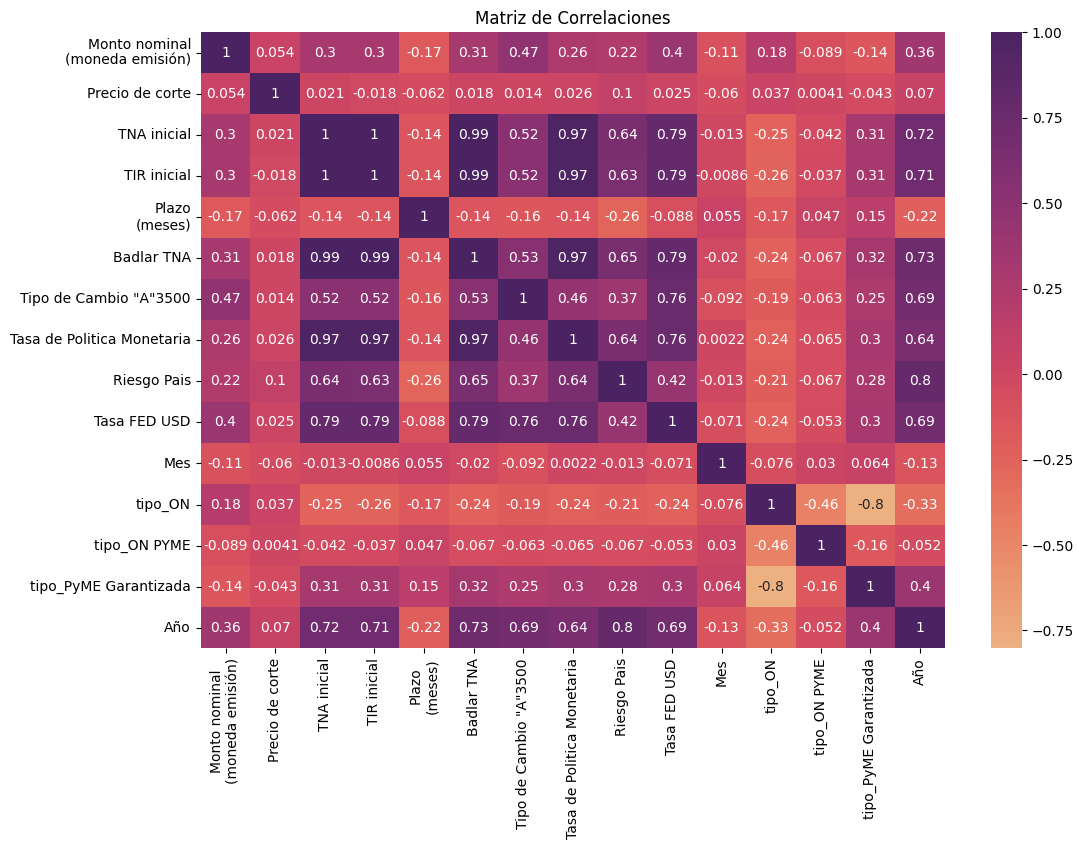

In [ ]:
matriz_de_correlaciones = df_ON_pesos.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_de_correlaciones, annot=True, cmap='flare')
plt.title('Matriz de Correlaciones')

En el análisis de correlación demuestra la tasa de Politica Monetaria es las variables que más afectan a la TIR Inicial. Resulta interesante ver que el Plazo la afecta de manera negativa, esto se debe a que comunmente los mejores emisores tienen posibilidad de ofrecer ONs a plazos mayores a 2 años, al ser mejores emisores, las tasas exigidas son menores.
Las variables interesantes para estimar la TIR Inicial son, Monto Nominal, Riesgo País y Régimen de Emisión (Dummies).

##Emisiones Hard Dollar

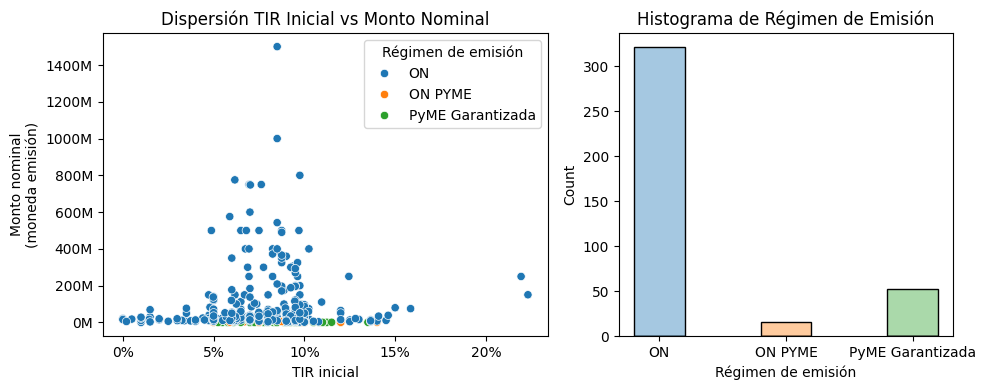

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.scatterplot(data=df_ON_USD, x="TIR inicial", y="Monto nominal\n(moneda emisión)", hue="Régimen de emisión", ax=axs[0])
axs[0].set_title('Dispersión TIR Inicial vs Monto Nominal')

axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

sns.histplot(data=df_ON_USD, x="Régimen de emisión", hue="Régimen de emisión", shrink=0.4, alpha=0.4, legend=False, ax=axs[1])
axs[1].set_title('Histograma de Régimen de Emisión')

f.tight_layout()
plt.show()

In [ ]:
df_ON_USD['Monto nominal\n(moneda emisión)'].max()
df_ON_USD.loc[df_ON_USD['Monto nominal\n(moneda emisión)'] == df_ON_USD['Monto nominal\n(moneda emisión)'].max()]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
52,2015-04-28,2015-04-28,YPF S.A.,Clase XXXIX,USD,1.500000e+09,Fija,0.99097,0.085,0.085,...,8.9,0.38,603,0.0013,4,True,False,False,ON,2015


Impresionante emisión de YPF por 1.500M USD

In [ ]:
df_ON_USD.loc[df_ON_USD['TIR inicial'] > 0.20]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
435,2017-02-10,2017-02-17,Banco de Galicia y Buenos Aires S.A.,Clase III,USD,150537000.0,Margen+Badlar,1.0,0.223150,0.223150,...,15.55,0.2475,446,0.0066,2,True,False,False,ON,2017
454,2017-04-06,2017-04-11,Tarjeta Naranja S.A.,Clase XXXVII,USD,250000000.0,Margen+Badlar,1.0,0.219375,0.219375,...,15.41,0.2475,439,0.0091,4,True,False,False,ON,2017


Las emisiones son en USD pero luego se analiza en pesos licitada a Margen + Badlar.

In [ ]:
df.loc[df['Tipo de Tasa'] == 'Margen+Badlar', 'Moneda'] = '$'
df_pesos = df[df['Moneda'] == '$']
df_ON_USD = df[df['Moneda'] == 'USD']
df_ON_USD.loc[df_ON_USD['TIR inicial'] > 0.20]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD


In [ ]:
df_ON_USD.loc[df_ON_USD['TIR inicial'] <= 0]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Régimen de emisión,Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,Plazo\n(meses),Badlar TNA,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD
170,2015-11-10,2015-11-12,Compañía General de Combustibles S.A.,Clase 2,USD,20880968.0,ON,Fija,1.0,0.0,0.0,48.700000,0.235625,9.59,0.38,482,0.0012
1442,2022-05-02,2022-05-04,Banco Hipotecario S.A.,Clase 6,USD,15947600.0,ON,Fija,1.0,0.0,0.0,24.366667,0.446250,115.75,0.47,1817,0.0033


Luego de ser revisadas, verificamos que estas emisiones salieron a tasa del 0%.

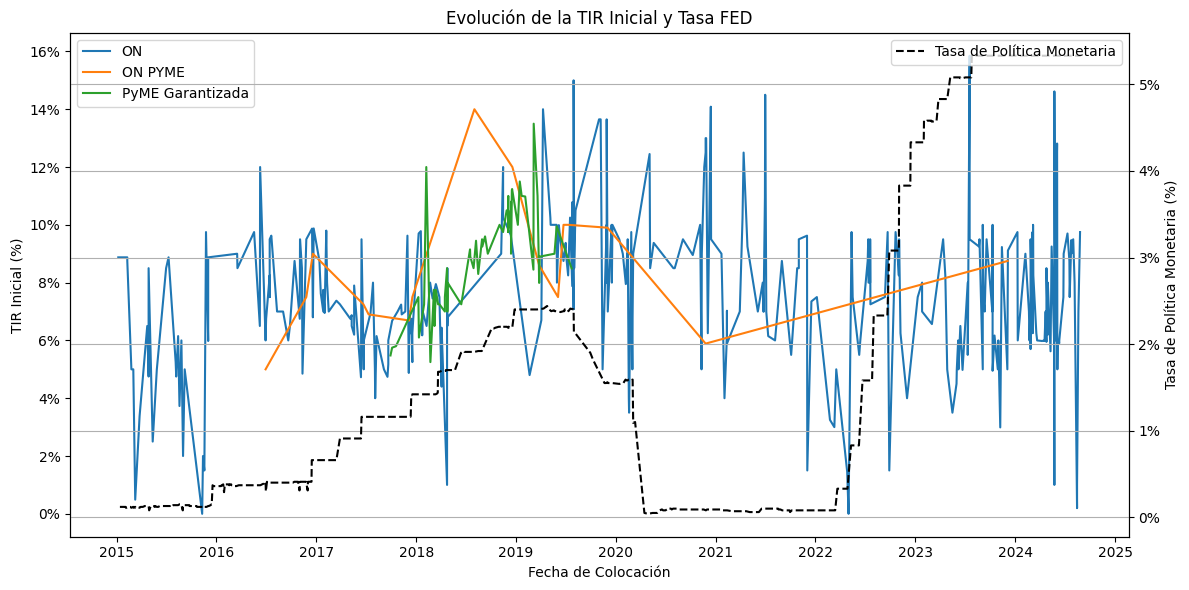

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

for regimen in ['ON', 'ON PYME', 'PyME Garantizada']:
    df_regimen = df_ON_USD[df_ON_USD['Régimen de emisión'] == regimen]
    if not df_regimen.empty:
        ax1.plot(df_regimen['Fecha Colocación'], df_regimen['TIR inicial'] * 100, label=regimen)

ax1.set_xlabel('Fecha de Colocación')
ax1.set_ylabel('TIR Inicial (%)')
ax1.tick_params(axis='y')
ax1.set_title('Evolución de la TIR Inicial y Tasa FED')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

ax2 = ax1.twinx()
ax2.plot(df_ON_pesos['Fecha Colocación'], df_ON_pesos['Tasa FED USD'] * 100, color='black', label='Tasa de Política Monetaria', linestyle='--')

ax2.set_ylabel('Tasa de Política Monetaria (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe una mayor estabilidad de tasas teniendo en cuenta el contexto que el dólar estadounidense tiene mayor estabilidad que el peso argentino. Interesante observar que la tasas que maneja la Argentina no tienen relación con la tasa en dólares de referencia mundial, despues del gráfico de correlaciones se detalla el motivo.

Text(0.5, 1.0, 'Matriz de Correlaciones')

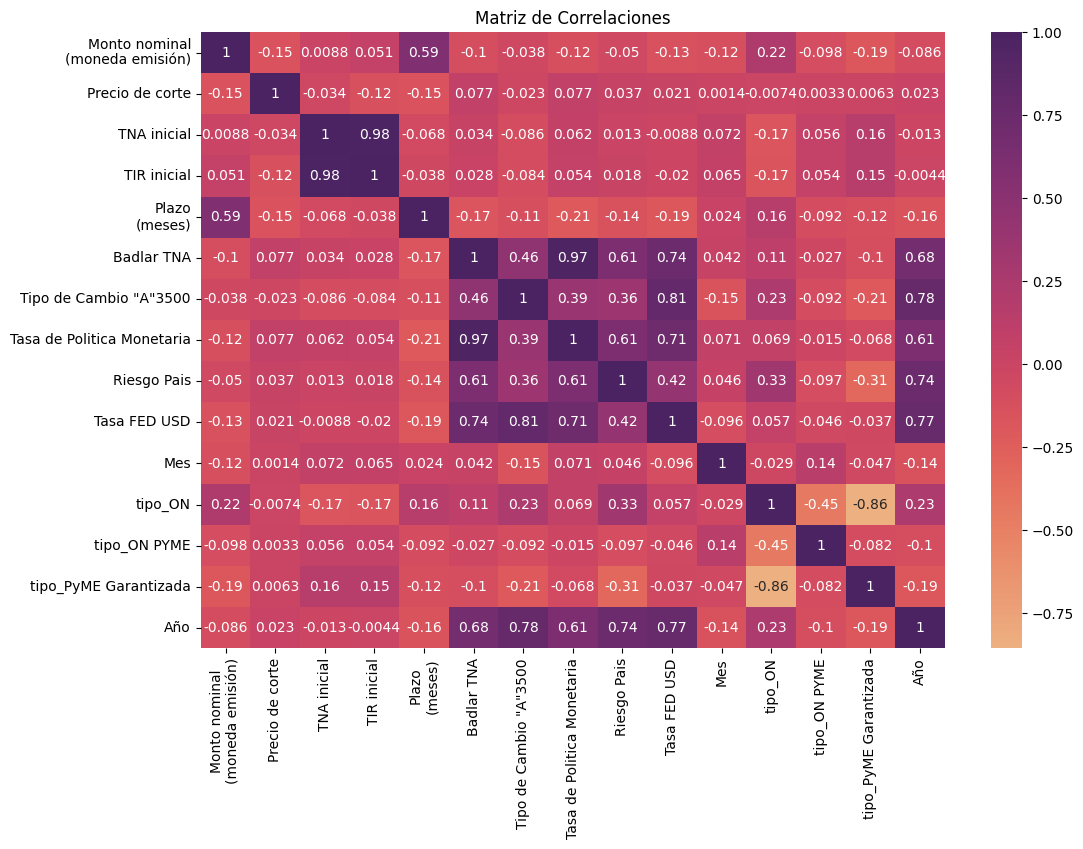

In [ ]:
df_ON_USD = df_ON[df_ON["Moneda"] == "USD"]
matriz_de_correlaciones = df_ON_USD.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_de_correlaciones, annot=True, cmap='flare')
plt.title('Matriz de Correlaciones')

Resulta interesante ver que practicamente ninguna variable afecta a las emisiones Hard Dollar, inclusive la tasa del tesoro americano. El principal motivo es que Argentina durante este periodo de tiempo tuvo y tiene restricciones para al acceso a moneda extranjera, lo que hizo que las tasas internas queden desarbitradas con el resto del mundo. En principio, resulta dificil imaginar un modelo para estimar este tipo de emisiones.

##Emisiones Dólar Linked

###¿Qué es Dólar Linked?

####El dólar linked es una medida que ajusta un activo basándose en la variación del valor oficial del dólar. En este sentido, los activos más comunes son las ONs dólar linked. Se trata de instrumentos de deuda en pesos que ajustan su valor a una tasa de interés fija, que generalmente es baja, a lo que se suma la variación del dólar oficial.

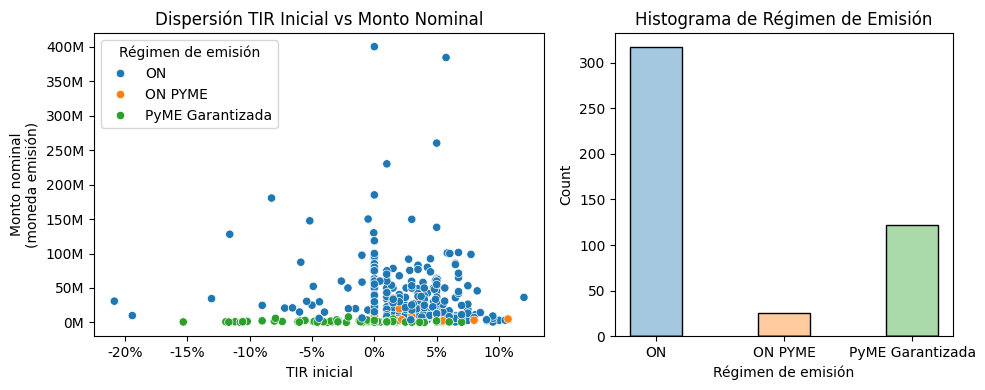

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.scatterplot(data=df_ON_DL, x="TIR inicial", y="Monto nominal\n(moneda emisión)", hue="Régimen de emisión", ax=axs[0])
axs[0].set_title('Dispersión TIR Inicial vs Monto Nominal')

axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

sns.histplot(data=df_ON_DL, x="Régimen de emisión", hue="Régimen de emisión", shrink=0.4, alpha=0.4, legend=False, ax=axs[1])
axs[1].set_title('Histograma de Régimen de Emisión')

f.tight_layout()
plt.show()

In [ ]:
df_ON_DL.loc[df_ON_DL['Monto nominal\n(moneda emisión)'] == df_ON_DL['Monto nominal\n(moneda emisión)'].max()]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
1869,2023-09-07,2023-09-12,YPF S.A.,Clase XXVI,Dólar Linked,400000000.0,Fija,1.0,0.0,0.0,...,349.99,1.18,2131,0.0533,9,True,False,False,ON,2023


Una vez más YPF realizando la emisión por mayor monto.

In [ ]:
df_ON_DL.loc[df_ON_DL['TIR inicial'] >0.10]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
966,2020-02-14,2020-02-19,Rizobacter Argentina S.A.,Serie II - Clase A,Dólar Linked,3338830.0,Fija,1.0000,0.105,0.105000,...,61.45,0.48,2014,0.0158,2,True,False,False,ON,2020
1299,2021-09-03,2021-09-03,Alto Real Viñedos S.A.,Clase I,Dólar Linked,5000000.0,Fija,0.7447,0.040,0.107225,...,97.87,0.38,1487,0.0008,9,False,True,False,ON PYME,2021
1765,2023-05-23,2023-05-24,CNH Industrial Capital Argentina S.A.,Clase 5,Dólar Linked,36375673.0,Fija,1.2400,0.000,0.120000,...,234.92,0.97,2577,0.0508,5,True,False,False,ON,2023


In [ ]:
df_ON_DL.loc[df_ON_DL['TIR inicial'] < -0.15]

,Fecha Colocación,Fecha de Emisión y Liquidación,Sociedad,Serie/Clase,Moneda,Monto nominal\n(moneda emisión),Tipo de Tasa,Precio de corte,TNA inicial,TIR inicial,...,"Tipo de Cambio ""A""3500",Tasa de Politica Monetaria,Riesgo Pais,Tasa FED USD,Mes,tipo_ON,tipo_ON PYME,tipo_PyME Garantizada,Régimen de emisión,Año
1925,2023-11-16,2023-11-17,Banco de Servicios y Transacciones S.A.,Clase XIV,Dólar Linked,10000000.0,Fija,1.2910,0.0,-0.194177,...,353.48,1.33,2397,0.0533,11,True,False,False,ON,2023
1929,2023-12-01,2023-12-05,Centro de Desarrollo Agrícola S.A.,Serie I Clase II,Dólar Linked,750000.0,Fija,1.3400,0.0,-0.153318,...,361.03,1.33,1982,0.0533,12,False,False,True,PyME Garantizada,2023
1932,2023-12-05,2023-12-06,Telecom Argentina S.A.,Adicionales Clase 19,Dólar Linked,30908151.0,Fija,1.6155,0.0,-0.208596,...,363.03,1.33,1937,0.0533,12,True,False,False,ON,2023


En momentos previos a la devaluación de finales de 2023 ,las empresas estaban saliendo a TIR -20% ya que había una expectativa de una gran devaluación del dólar oficial.

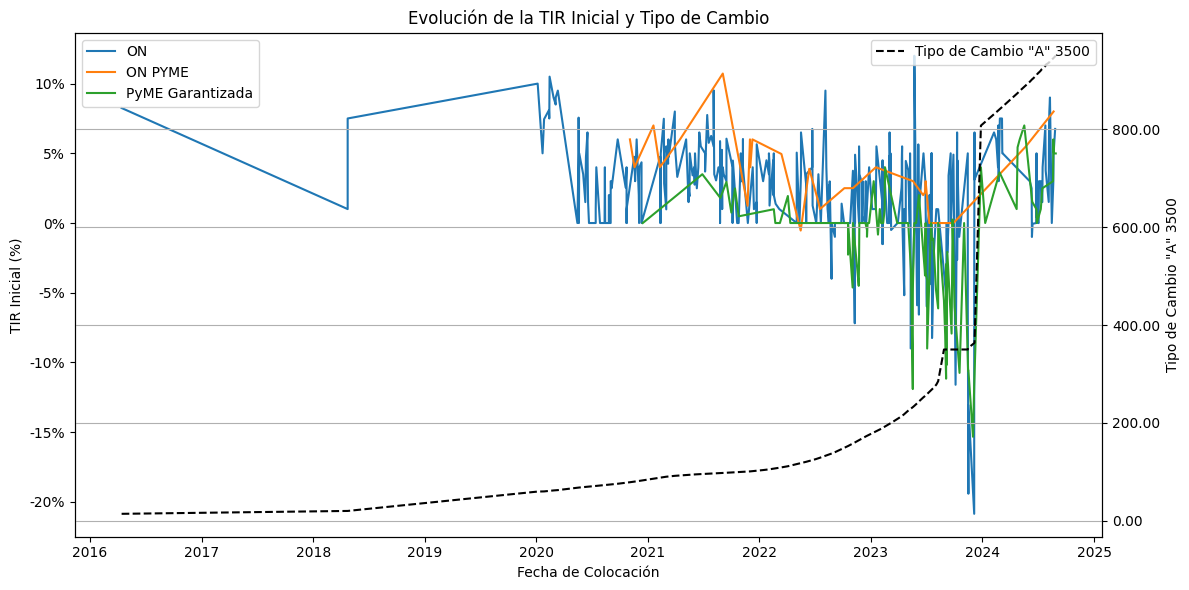

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

for regimen in ['ON', 'ON PYME', 'PyME Garantizada']:
    df_regimen = df_ON_DL[df_ON_DL['Régimen de emisión'] == regimen]
    if not df_regimen.empty:
        ax1.plot(df_regimen['Fecha Colocación'], df_regimen['TIR inicial'] * 100, label=regimen)

ax1.set_xlabel('Fecha de Colocación')
ax1.set_ylabel('TIR Inicial (%)')
ax1.tick_params(axis='y')
ax1.set_title('Evolución de la TIR Inicial y Tipo de Cambio')

ax2 = ax1.twinx()
ax2.plot(df_ON_DL['Fecha Colocación'], df_ON_DL['Tipo de Cambio "A"3500'], color='black', label='Tipo de Cambio "A" 3500', linestyle='--')

ax2.set_ylabel('Tipo de Cambio "A" 3500', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se puede observar como en momentos previos a la devaluaaciones, las emisiones salen con tir inferior al 0%.

Text(0.5, 1.0, 'Matriz de Correlaciones')

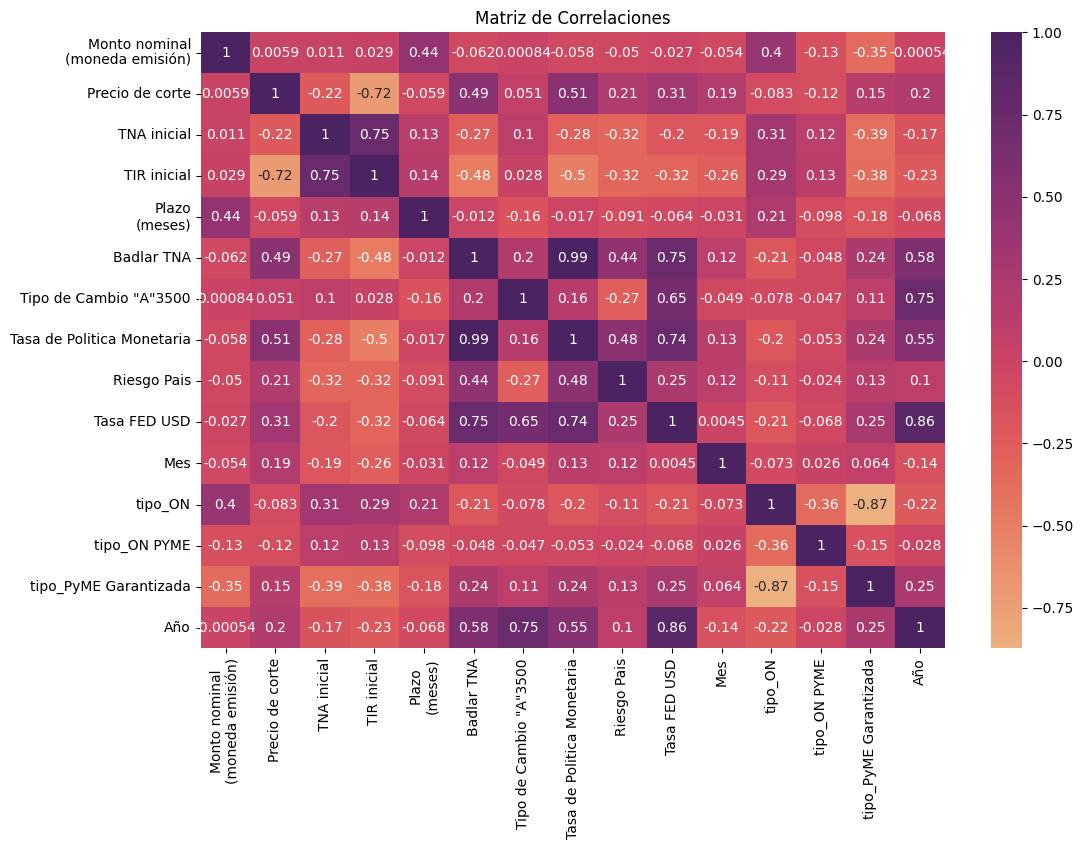

In [ ]:
matriz_de_correlaciones = df_ON_DL.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_de_correlaciones, annot=True, cmap='flare')
plt.title('Matriz de Correlaciones')

Resulta interesante ver que el Tipo de Cambio no relacione fuertemente con la TIR de este tipo de instrumentos, aunque vimos una gran relación en el gráfico anterior. Esto se debe a que la tasa de las emisiones estan fuertemente influenciada con expectativas del movimiento del tipo de cambio y no sobre el tipo de cambio al momento de la emisión. Es por eso que expecto utilicemos una base aparte que analice como fue variando el tipo de cambio en fechas posteriores a las fechas de colocación, resulta dificil estimar instrumentos en esta medida.

##Conclusión Intermedia

#### Debido a la experiencia argentina y características de las emisiones en Dólares y Dólar Linked resulta dificultoso armar un modelo de predicción de la TIR Inicial para las emisiones de las monedas mencionadas.

####Por ende, **vamos a centrar el proyecto en las emisiones de ONs en pesos**. Sin embargo, no descartamos sumar datos macroeconómicos o analizar variables en momentos distintos a las fechas de colocaciones con el fin de poder ampliar a este análisis a las emisiones Hard Dollar y/o Dólar Linked.

##Modelo de predicción

El objetivo de este proyecto es poder estimar la TIR Inicial de las ONs en pesos con el fin de poder conocer antes de la fecha de licitación a que tasa aproximada se va a financiar la emisora.

Sabiendo que la variable a estimar es una variable que ya esta etiquetada en nuestro dataframe, se utilizará un **modelo supervisado**. Al mismo tiempo, ya que la varible es una variable continua, dentro del mundo de los algoritmos supervisados, utilizaremos una **regresión** para realizar la predicción.

En conclusión el modelo a utilizar sera un **modelo de regresión multivariante**, ya que tendremos más de una variable independiente para predecir la variable dependiente.

Creamos una copia del dataframe de ONs pesos, debido a que es dificultoso armar los modelos cuando las columnas tienen nombre con espacios.

In [ ]:
df_pesos_copia = df_ON_pesos.copy()
df_pesos_copia.columns = [
    'Fecha_Colocacion',
    'Fecha_Emision_Liquidacion',
    'Sociedad',
    'Serie_Clase',
    'Moneda',
    'Monto_nominal_moneda_emision',
    'Tipo_de_Tasa',
    'Precio_de_corte',
    'TNA_inicial',
    'TIR_inicial',
    'Plazo_meses',
    'Badlar_TNA',
    'Tipo_de_Cambio_A3500',
    'Tasa_de_Politica_Monetaria',
    'Riesgo_Pais',
    'Tasa_FED_USD',
    'Mes',
    'tipo_ON',
    'tipo_ON_PYME',
    'tipo_PyME_Garantizada',
    'Regimen_de_emision',
    'Año'
]

print(df_pesos_copia.columns)

Index(['Fecha_Colocacion', 'Fecha_Emision_Liquidacion', 'Sociedad',
       'Serie_Clase', 'Moneda', 'Monto_nominal_moneda_emision', 'Tipo_de_Tasa',
       'Precio_de_corte', 'TNA_inicial', 'TIR_inicial', 'Plazo_meses',
       'Badlar_TNA', 'Tipo_de_Cambio_A3500', 'Tasa_de_Politica_Monetaria',
       'Riesgo_Pais', 'Tasa_FED_USD', 'Mes', 'tipo_ON', 'tipo_ON_PYME',
       'tipo_PyME_Garantizada', 'Regimen_de_emision', 'Año'],
      dtype='object')


Comenzaremos con el modelo base para comenzar a conocer las caracteristicas de nuestros datos, para eso, creamos un modelo de regresión lineal.

Utilizando los resultados del cuadro de correlaciones, decidimos utilizar tres parametros para estimar la TIR Inicial: La tasa de política monetaria, el riesgo pais y el tipo de emisión ON Panel General.

In [ ]:
model1 = 'TIR_inicial ~ Tasa_de_Politica_Monetaria + Monto_nominal_moneda_emision + tipo_ON + Riesgo_Pais + Plazo_meses'
lm1 = smf.ols(formula=model1, data=df_pesos_copia).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:            TIR_inicial   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3550.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:09   Log-Likelihood:                 1676.4
No. Observations:                1148   AIC:                            -3341.
Df Residuals:                    1142   BIC:                            -3310.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

##Análisis de resultado de la regresión lineal

El **R cuadrado de 0,940**, indica que el modelo explica el 94% de la variabilidad de la TIR Inicial, por lo cual las variables independientes captan de una manera muy precisa los movimientos de la variable dependiente.

Las probabilidades del **p-value da para tres variables 0.00**, por lo que incluso con el 99% de confianza podemos afirmar que las variables indpendientes son significativas para predecir a la TIR Inicial excepto el Riesgo País y el Plazo.

El **monto nominal tiene un valor de coeficiente muy bajo** , por lo que no impacta de manera significativa a la tasa de financiamiento de las empresas.

La variable **ON pyme tiene un coeficiente negativo**, por lo que se demuestra que las emisiones de empresas grandes salen a menor tasa que las empresas PyME.

El **coeficiente de politica monetaria es 0,9871** lo que demuestra que es la variable que más explica el comportamiento de las tasas de las emisiones de las ONs.




##Problemas

Recordando que para utilizar la regresión lineal necesitamos **normalidad** de los residuos, que no haya correlacción entre las variables **independientes** y entre los residuos y que los residuos tengan una variable constante (**Homocedasticidad**) , encontramos ciertos problemas con los resultados del modelo.

Tanto el test de **Durbin- Watson** como el test de **Jarque-Bera**, me indica que **los residuos no tienen una distribución normal** ,por lo que la normalidad de los residuos no se cumpliría.

Además, existe **multicolinealidad** en el modelo ,por lo que existe posibilidd tanto  las variables independientes como los residuos estan correlacionadas entre si.

Ambos problemas afectan a la predicción del modelo, por lo que intentaremos resolver ambos problemas.

###Comenzamos analizando la Multicolinealidad

Para eso utilizamos la variable VIF que mide el aumento de varianza de un coeficiente debido a la colinealidad entre las variables independientes.

In [ ]:
df_pesos_copia['tipo_ON'] = df_pesos_copia['tipo_ON'].astype(int)
X = add_constant(df_pesos_copia[['Tasa_de_Politica_Monetaria', 'Riesgo_Pais', 'Monto_nominal_moneda_emision', 'tipo_ON', 'Plazo_meses']])
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       Variable        VIF
0                         const  16.745197
1    Tasa_de_Politica_Monetaria   1.787764
2                   Riesgo_Pais   1.814275
3  Monto_nominal_moneda_emision   1.171459
4                       tipo_ON   1.201373
5                   Plazo_meses   1.142907


Los resultados del VIF muestran que **todas las variables independientes tienen valores de VIF bastante bajos** (menores a 5), excepto el intercepto (const), que tiene un VIF de 15.67.
Este valor alto para el intercepto no es problemático en sí mismo, ya que no afecta la interpretación de las variables independientes ni genera problemas de multicolinealidad entre ellas. Con estos resultados, parece que **no hay multicolinealidad preocupante entre las variables independientes**.

Por ende nos centraremos en resolver la no normalidad de los residuos.


                            OLS Regression Results                            
Dep. Variable:            TIR_inicial   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5914.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:09   Log-Likelihood:                 1675.1
No. Observations:                1148   AIC:                            -3342.
Df Residuals:                    1144   BIC:                            -3322.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

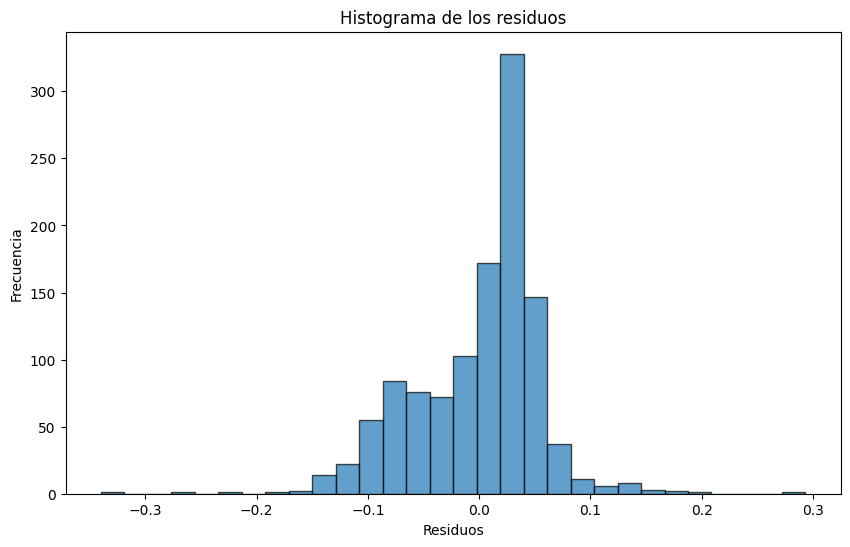

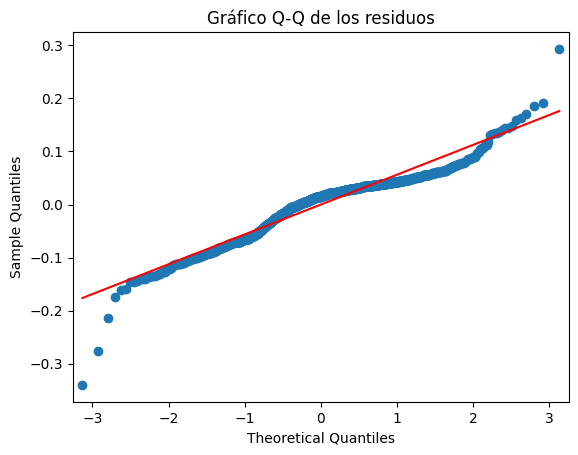

Prueba de Shapiro-Wilk
Estadístico: 0.9364397802649393, p-valor: 1.0016510598451152e-21

Prueba de Jarque-Bera
Estadístico: 309.2717532760441, p-valor: 6.958122523410563e-68


In [ ]:
model1 = 'TIR_inicial ~ Tasa_de_Politica_Monetaria + Monto_nominal_moneda_emision + tipo_ON'
lm1 = smf.ols(formula=model1, data=df_pesos_copia).fit()
print(lm1.summary())
residuals = lm1.resid

#Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

#Gráfico Q-Q para evaluar normalidad
sm.qqplot(residuals, line='s')
plt.title("Gráfico Q-Q de los residuos")
plt.show()

#Prueba de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print("Prueba de Shapiro-Wilk")
print(f"Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}")

#Prueba de Jarque-Bera
jarque_bera_test = stats.jarque_bera(residuals)
print("\nPrueba de Jarque-Bera")
print(f"Estadístico: {jarque_bera_test.statistic}, p-valor: {jarque_bera_test.pvalue}")


Los resultados de Shapiro - Wilk y de Jarque - Bera me confirman la que los residuos no siguen una distribución normal. Por lo que intentaremos solucionar este problema a traves de transformación de variables.

In [ ]:
df_pesos_copia['log_TIR_inicial'] = np.log(df_pesos_copia['TIR_inicial'] + 1)

model2 = 'log_TIR_inicial ~ Tasa_de_Politica_Monetaria + Monto_nominal_moneda_emision + tipo_ON + Riesgo_Pais + Plazo_meses'
lm2 = smf.ols(formula=model2, data=df_pesos_copia).fit()

print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:        log_TIR_inicial   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3358.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:10   Log-Likelihood:                 2177.7
No. Observations:                1148   AIC:                            -4343.
Df Residuals:                    1142   BIC:                            -4313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

La transformación logaritmica no logra resolver el problema de la normalidad de residuos.

In [ ]:
#Transformación Logarítmica
df_pesos_copia['TIR_inicial_log'] = np.log1p(df_pesos_copia['TIR_inicial'])

#Test de Shapiro-Wilk para la transformación logarítmica
shapiro_log = stats.shapiro(df_pesos_copia['TIR_inicial_log'])
print("Shapiro-Wilk Test para TIR_inicial_log:")
print(f"W-statistic: {shapiro_log.statistic}, p-value: {shapiro_log.pvalue}")

#Transformación de Raíz Cuadrada
df_pesos_copia['TIR_inicial_sqrt'] = np.sqrt(df_pesos_copia['TIR_inicial'])

#Test de Shapiro-Wilk para la transformación de raíz cuadrada
shapiro_sqrt = stats.shapiro(df_pesos_copia['TIR_inicial_sqrt'])
print("Shapiro-Wilk Test para TIR_inicial_sqrt:")
print(f"W-statistic: {shapiro_sqrt.statistic}, p-value: {shapiro_sqrt.pvalue}")

#Transformación Box-Cox
# Asegúrate de que no haya ceros en los datos para Box-Cox
df_pesos_copia['TIR_inicial_boxcox'], fitted_lambda = stats.boxcox(df_pesos_copia['TIR_inicial'] + 1)

#Test de Shapiro-Wilk para la transformación Box-Cox
shapiro_boxcox = stats.shapiro(df_pesos_copia['TIR_inicial_boxcox'])
print("Shapiro-Wilk Test para TIR_inicial_boxcox:")
print(f"W-statistic: {shapiro_boxcox.statistic}, p-value: {shapiro_boxcox.pvalue}")


Shapiro-Wilk Test para TIR_inicial_log:
W-statistic: 0.8366584610127582, p-value: 1.0099704875362886e-32
Shapiro-Wilk Test para TIR_inicial_sqrt:
W-statistic: 0.8595441429690716, p-value: 8.37223521014618e-31
Shapiro-Wilk Test para TIR_inicial_boxcox:
W-statistic: 0.9513052079857125, p-value: 4.725992288691386e-19


La transformacion de raíz cuadrada y Box-Cox tampoco resuelve el problema, por lo que dejaremos de usar la regresión lineal y utilizaremos modelos más robustos que no asumen que los residuos sigan una distribución normal.

##Buscando el modelo que mejor se ajuste a nuestros datos

Investigaremos modelos más robustos y veremos cuál nos da mejores resultados.

In [ ]:
X = df_pesos_copia[['Tasa_de_Politica_Monetaria', 'Riesgo_Pais', 'Monto_nominal_moneda_emision', 'tipo_ON', 'Plazo_meses']]
y = df_pesos_copia['TIR_inicial']

# Dividir los datos en conjuntos de entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

#Modelo de Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

#Modelo de K-Vecinos más Cercanos
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_lin = calculate_metrics(y_test, y_pred_lin)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_knn = calculate_metrics(y_test, y_pred_knn)

print("Regresión Lineal - MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, R^2: {:.4f}".format(*metrics_lin))
print("Random Forest - MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, R^2: {:.4f}".format(*metrics_rf))
print("K-Vecinos más Cercanos - MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, R^2: {:.4f}".format(*metrics_knn))

cv_scores_rf = cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Mean Cross-Validated MSE for Random Forest: {:.4f}".format(-cv_scores_rf.mean()))


Regresión Lineal - MAE: 0.0443, MSE: 0.0032, RMSE: 0.0567, R^2: 0.9275
Random Forest - MAE: 0.0221, MSE: 0.0013, RMSE: 0.0363, R^2: 0.9702
K-Vecinos más Cercanos - MAE: 0.1336, MSE: 0.0393, RMSE: 0.1983, R^2: 0.1134
Mean Cross-Validated MSE for Random Forest: 0.0193


Realizando una comparación entre la regresión lineal, Random Foresty K Vecinos Cercanos, obtenemos que el Random Forest tiene un R cuadrado más alto y MAE y RMSE más bajo.



##Random Forest y la Distribución de los Residuos
Random Forest no asume que los residuos sigan una distribución normal. Este algoritmo es un modelo no paramétrico basado en árboles de decisión, lo que significa que no requiere que los datos o los residuos cumplan con una estructura específica de distribución. Esto es útil porque permite al modelo capturar relaciones no lineales y patrones complejos en los datos.

##Hiperparametros
A diferencia de los parámetros del modelo (que se aprenden durante el entrenamiento, como los coeficientes en la regresión lineal), los hiperparámetros son configuraciones que el usuario debe establecer antes del entrenamiento. Por ejemplo, el número de árboles en un modelo de Random Forest.



##Hiperparametros del Random Forest

1) El número de árboles
2) La profundidad de cada árbol es decir, el número máximo de divisiones que un árbol puede tener.
3) Número mínimo de muestras necesarias para dividir un nodo en el árbol.

##¿Por qué es importante elegir los mejores hiperparámetros?

Mejor rendimiento: Ajustar los hiperparámetros adecuados puede mejorar considerablemente el rendimiento del modelo, aumentando su precisión y capacidad de generalización.

Prevención de sobreajuste: Algunos hiperparámetros ayudan a controlar la complejidad del modelo, evitando que se ajuste demasiado a los datos de entrenamiento (lo que hace que el modelo sea menos eficaz en los datos nuevos o de prueba).

Optimización del tiempo de cómputo: Al elegir los hiperparámetros adecuados, no solo mejoras el rendimiento, sino que también puedes reducir el tiempo de entrenamiento del modelo.


La selección de hiperparámetros se puede hacer por Grid Search que prueba de manera exhaustiva todas las combinaciones posibles de valores de hiperparámetros que has definido en un espacio de búsqueda.

In [ ]:
X = df_pesos_copia[['Tasa_de_Politica_Monetaria', 'Riesgo_Pais', 'Monto_nominal_moneda_emision', 'tipo_ON', 'Plazo_meses']]
y = df_pesos_copia['TIR_inicial']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mejores parámetros:", grid_search.best_params_)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
print("Modelo guardado como 'best_random_forest_model.pkl'")

# Predicción ficticia
new_data = pd.DataFrame({
    'Tasa_de_Politica_Monetaria': [0.35],
    'Riesgo_Pais': [1300],
    'Monto_nominal_moneda_emision': [50000000000],
    'tipo_ON': [True],
    'Plazo_meses': [24]
})


new_data_scaled = scaler.transform(new_data)

tir_inicial_pred = best_rf_model.predict(new_data_scaled)
print(f'Predicción de TIR_inicial para los nuevos datos: {tir_inicial_pred[0]}')


Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.0219, MSE: 0.0013, RMSE: 0.0361, R^2: 0.9707
Modelo guardado como 'best_random_forest_model.pkl'
Predicción de TIR_inicial para los nuevos datos: 0.4082534818864123


La profundidad máxima de cada arbol es 10, el numero mínimo de muestras que debe tener un nodo para dividirse es 2 y con 200 arboles de decision el modelo toma decisiones más robustas.

##Predicción


Hicimos una predicción ficticia de una empresa que quiere emitir 500 mil millones de pesos en el mercado, con un plazo de 24 meses en el Régimen de panel general cuando la tasa de politica monetaria es de 35% y el riesgo pais alcanza los 1300 puntos.

**La predicción nos da que la tasa a la cúal la empresa se va a poder financiar es al 40,83%.** Teniendo en cuentra que la BADLAR sigue de manera casi perfecta a la tasa de política monetaria significaría que esta empresa esta saliendo al mercado a un spread sobre la Badlar de 5%, concidente con recientes emisiones.

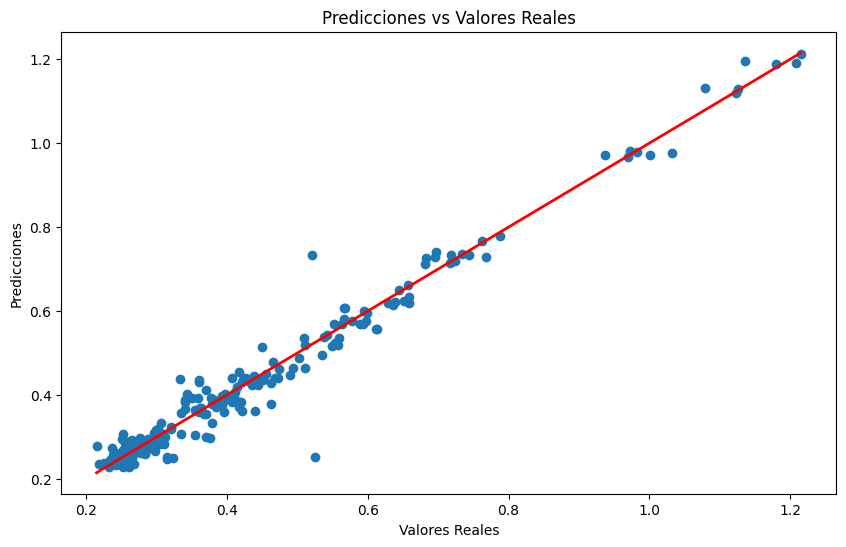

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


Observamos que las predicciones contemplan de buena manera los valores reales de la TIR Inicial.

La principal variable que explica el comportamiento de la tir inicial es la Tasa de politica monetaria, seguida por el Riesgo Pais, Monto de la emisión , Plazo y por último el Régimen de emisión.

##Conclusiones

###Recordamos las hípotesis planteadas

1. Las emisiones de empresas grandes (Régimenes de Emisión "ON") consiguen financiarse a menor tasa.

2. A mayor monto emitido, la tasa que la empresa debe aceptar es mayor.

3. Las variables macroeconomicas (Tasa de politica monetaría), Tipo de Cambio, Riesgo País y Tasa de la FED son las variables que más impactan las emisiones segun la moneda de emisión.

4. A mayor plazo, la tasa de emisión es mayor.

####**Determinantes clave**: La Tasa de Política Monetaria y el Riesgo País son las principales variables que explican el comportamiento de la TIR inicial, alineándose con lo esperado de las variables macroeconómicas.

####**Régimen "ON":** Las emisiones bajo este régimen tienden a financiarse a tasas más bajas, lo cual está en línea con la percepción de menor riesgo para empresas más grandes o consolidadas.

####**Monto emitido:** A pesar del coeficiente pequeño en magnitud, existe una relación positiva entre el monto nominal y la TIR inicial.

####**Plazo:** Sorprendentemente, el plazo no parece ser un factor significativo en la determinación de la TIR inicial en este modelo.



####Los resultados del análisis confirman que, independientemente de la solidez financiera o el buen desempeño operativo de las compañías, la situación macroeconómica del país es el principal determinante del riesgo asociado a su financiamiento. Esto se refleja especialmente en la alta significancia de variables como la **Tasa de Política Monetaria** y el **Riesgo País**, las cuales tienen un impacto sustancial en la TIR inicial.

####Es importante destacar que las calificadoras de riesgo asumen que ninguna compañía puede ser menos riesgosa que el país en el que opera. Esto se debe a que, a diferencia de las empresas, un país no puede quebrar en sentido estricto, ya que tiene mecanismos como la emisión de moneda para afrontar crisis. Por lo tanto, el riesgo soberano actúa como un piso mínimo para el riesgo percibido de cualquier compañía dentro de su jurisdicción.

####En resumen, mientras las características internas de las emisiones corporativas (como el monto emitido o el tipo de régimen) tienen influencia, el **riesgo soberano del país siempre será la base fundamental sobre la cual se evalúa el riesgo de las empresas locales**. Esto subraya la importancia de las condiciones macroeconómicas para el desarrollo del mercado de capitales.